<a href="https://colab.research.google.com/github/emms204/DataDrive2030-Early-Learning-Predictors-/blob/main/DataDrive2030_Early_Learning_Predictors_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/DataDrive2030 Early Learning Predictors Challenge')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.9 MB/s eta 0:00:00


In [5]:
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 17.1 MB/s eta 0:00:00


In [6]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import shap

In [7]:
Train = pd.read_csv('Train_DD.csv')
Test = pd.read_csv('Test_DD.csv')
Sub = pd.read_csv('SampleSubmission.csv')
VarD = pd.read_csv('VariableDescription.csv')

In [8]:
Train.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,...,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target
0,ID_SYSJ2FM0D,2022.0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.500000
1,ID_J5BTFOZR3,2019.0,NaN,60.163933,NaN,NaN,NaN,1st year in the programme,103.000000,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.869999
2,ID_R00SN7AUD,2022.0,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.520000
3,ID_BSSK60PAZ,2021.0,2021-10-13,53.000000,2020-01-15,20.0,No,1st year in the programme,98.099998,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.599998
4,ID_IZTY6TC4D,2021.0,2021-10-13,57.000000,2021-10-13,0.0,NaN,2nd year in programme,114.000000,Almost always,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,76.599998


In [9]:
Test.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,...,obs_cooking_4,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7
0,ID_0I0999N6S,2021.0,2021-09-20,57.000000,NaN,NaN,Yes,2nd year in programme,108.0,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_GQ6ONJ4FP,2021.0,2021-10-21,54.000000,2021-01-10,9.0,Yes,1st year in the programme,105.0,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_YZ76CVRW3,2021.0,2021-05-17,57.000000,NaN,NaN,Yes,NaN,101.5,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_BNINCRXH8,2022.0,2022-09-09,59.334702,NaN,NaN,NaN,3rd year in programme,NaN,Almost always,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,ID_1U7GDTLRI,2021.0,2021-10-12,54.000000,2021-01-15,8.0,Yes,1st year in the programme,103.5,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pd.set_option('display.max_colwidth', 100)
VarD

,Variable Name,Variable Label,Answer Label
0,child_id,Unique child ID,Open ended
1,data_year,Year data was collected,Open ended
2,child_date,ELOM date,Open ended
3,child_age,Child age in months,Open ended
4,child_enrolment_date,Date enrolled in ELP,Open ended
...,...,...,...
676,child_attends,Does child attend an ECD programme?,NaN
677,child_attendance,How many days per week does the child attend the ECD programme,NaN
678,child_languages,Child home language(s),NaN
679,pri_fees_amount_pv,Facility monthly fee (present value),NaN


In [11]:
vard = VarD.set_index('Variable Name').T

In [12]:
def plot_missing_cols(df, threshold=0.8, plot=True):
  missing_per = df.isnull().sum()/len(df)
  missing_per_thresh = missing_per[missing_per>threshold]
  if plot:
    plt.figure(figsize=(20,10))
    plt.barh(missing_per_thresh.index, missing_per_thresh.values * 100)
    plt.xlabel('Percentage of missing values')
    plt.title(f'Missing percentage above {threshold*100}% theshold')
    plt.show()
  return missing_per_thresh.index


##Feature Visualization

In [13]:
def scatterplot(x,y):
  fig, ax = plt.subplots()
  ax.scatter(x,y)
  ax.set_xlabel(x.name)
  ax.set_ylabel(y.name)
  ax.set_title(f'{x.name} vs {y.name}')
  plt.show()

In [14]:
def boxplot(df):
  fig, ax = plt.subplots()
  ax.boxplot(df)
  ax.set_xticklabels(list(df.columns))
  ax.set_ylabel('Value')
  ax.set_title(f'Boxplot of {" vs ".join(list(df.columns))}')
  plt.show()

In [15]:
def heatmap(df, length=10, width=5, cmap='rocket'):
  heatmap_df = df.corr()
  fig, ax = plt.subplots(figsize=(length, width))
  sns.heatmap(data=heatmap_df, annot=True, cmap=cmap, ax=ax)
  ax.set_title(f'Heatmap of {" and ".join(list(df.columns))}')
  plt.show()

In [16]:
def violinplot(x, y,hue,split=False,scale=None,length=10, width=5):
  fig, ax = plt.subplots(figsize=(length,width))
  sns.violinplot(x=x,y=y,hue=hue,split=split,scale=scale,ax=ax)
  ax.set_title(f'ViolinPlot of {x.name} and {y.name}')
  ax.set_xlabel(x.name)
  ax.set_ylabel(y.name)
  plt.legend(title=hue.name)
  plt.show()

In [17]:
def barchart(x,y,length=10,width=5):
  fig, ax = plt.subplots(figsize=(length,width))
  sns.barplot(x=x,y=y,ax=ax)
  ax.set_title(f'Bar Chart of {x.name} and {y.name}')
  ax.set_xlabel(x.name)
  ax.set_ylabel(y.name)
  plt.show()

In [18]:
def stack_barchart(x,y,hue,length=10,width=5):
  fig, ax = plt.subplots(figsize=(length,width))
  sns.barplot(x=x,y=y,hue=hue,ax=ax)
  ax.set_title(f'Bar Chart of {x.name} and {y.name}')
  ax.set_xlabel(x.name)
  ax.set_ylabel(y.name)
  plt.legend(title=hue.name)
  plt.show()

In [19]:
Train['Train'] = 'Train'
Test['Train'] = 'Test'
Data = pd.concat([Train, Test])
data = Data.drop(['child_id'],axis=1)

In [20]:
def targetmap(age, target):
  if (age >= 49) and (age < 60):
    if (target >= 0) and (target < 36.02):
      return "At Risk"
    elif (target >= 36.02) and (target < 46.32):
      return "Falling Behind"
    elif (target >= 46.32) and (target < 101):
      return "Achieving the Standard"
  
  elif (age >= 60) and (age < 70):
    if (target >= 0) and (target < 43.24):
      return "At Risk"
    elif (target >= 43.24) and (target < 54.38):
      return "Falling Behind"
    elif (target >= 54.38) and (target < 101):
      return "Achieving the Standard"

In [21]:
Train['target_cat'] = Train[['child_age','target']].apply(lambda row:targetmap(row[0],row[1]),axis=1)

In [22]:
#Checking out the Children Columns
Train.filter(like='child').head(3)

,child_id,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,...,child_attendance,child_languages,child_age_group,pri_children_4_6_years,obs_toilets_children,count_children_present,count_children_attendance,count_children_precovid,count_toilets_children,language_child
0,ID_SYSJ2FM0D,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,Sometimes,Sometimes,...,NaN,NaN,50-59 months,NaN,NaN,NaN,NaN,NaN,NaN,Sesotho
1,ID_J5BTFOZR3,NaN,60.163933,NaN,NaN,NaN,1st year in the programme,103.000000,Sometimes,Almost never,...,NaN,NaN,60-69 months,NaN,NaN,NaN,NaN,NaN,NaN,isiZulu
2,ID_R00SN7AUD,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,Often,Often,...,NaN,NaN,60-69 months,NaN,NaN,NaN,NaN,NaN,8.0,Afrikaans


In [23]:
vard[Train.filter(like='child').columns[10:]]

Variable Name,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,pri_children_4_6_years,obs_toilets_children,count_children_present,count_children_attendance,count_children_precovid,count_toilets_children,language_child
Variable Label,Was the child careful and diligent on tasks? Was child interested in accuracy?,Was the child interested and curious about the tasks throughout the assessment?,Total score from observing the child during assessments,Child gender,Child date of birth,Height for age based on WHO criteria (z-score),Stunted indicator,Does child attend an ECD programme?,How many days per week does the child attend the ECD programme,Child home language(s),Age group category,Children aged 4-6 years old,Are there separate toilet facilities for staff and learners?,How many children are present at the ECD Programme today?,"How many children usually attend the ECD Programme, on average?","How many children usually attended the ECD programme before the start of COVID on average""",How many childrens toilets are there?,What language does the child usually speak at home?
Answer Label,NaN,NaN,Open ended,NaN,Open ended,Open ended,NaN,NaN,NaN,NaN,NaN,Open ended,NaN,Open ended,Open ended,Open ended,Open ended,Open ended


###child grant

In [24]:
Train['child_grant'].isnull().sum()/len(Train)

0.36493884682585903

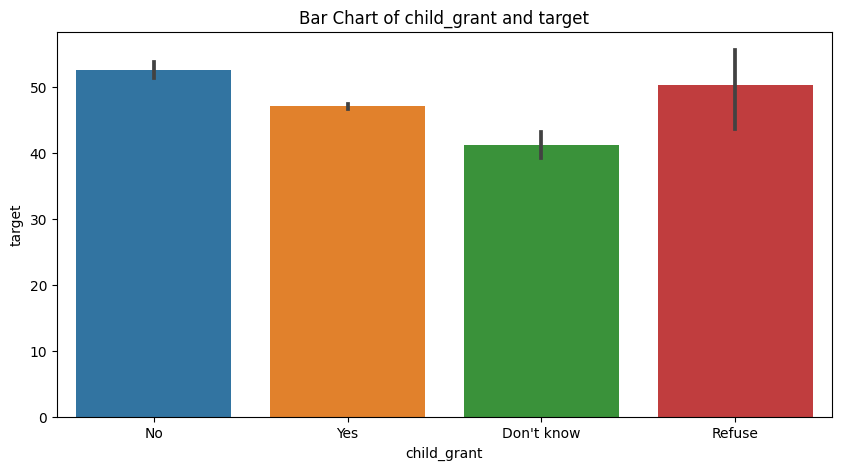

In [25]:
barchart(Train['child_grant'],Train['target'])

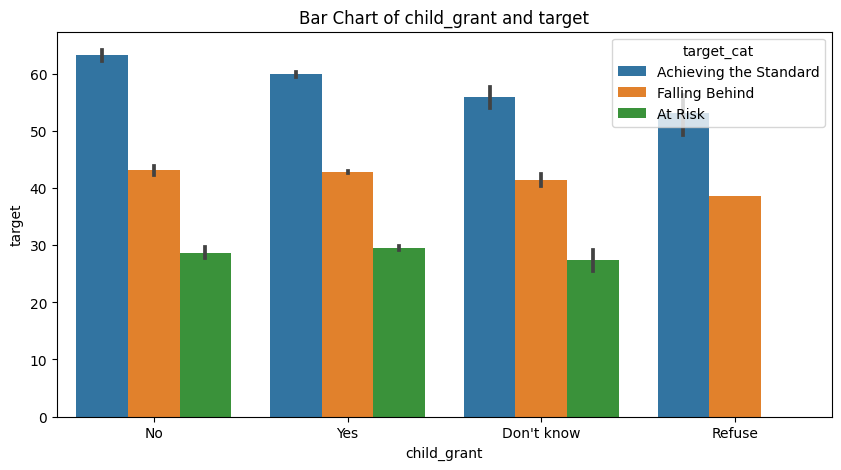

In [26]:
stack_barchart(Train['child_grant'],Train['target'],hue=Train['target_cat'])

In [27]:
#Children whose primary caretaker refused the Child Support Grant have no child At Risk
#Children whose primary caretaker refused the Child Support Grant have more children achieving the standard

In [28]:
Train['child_grant'].value_counts()

Yes           4515
No             764
Don't know     168
Refuse           5
Name: child_grant, dtype: int64

In [29]:
Train[Train['child_grant']=='Yes']['target_cat'].value_counts()/len(Train[Train['child_grant']=='Yes'])

Achieving the Standard    0.455814
Falling Behind            0.275083
At Risk                   0.269103
Name: target_cat, dtype: float64

In [30]:
Train[Train['child_grant']=='No']['target_cat'].value_counts()/len(Train[Train['child_grant']=='No'])

Achieving the Standard    0.615183
At Risk                   0.206806
Falling Behind            0.178010
Name: target_cat, dtype: float64

In [31]:
Train[Train['child_grant']=="Don't know"]['target_cat'].value_counts()/len(Train[Train['child_grant']=="Don't know"])

Falling Behind            0.345238
At Risk                   0.339286
Achieving the Standard    0.315476
Name: target_cat, dtype: float64

In [32]:
""" Child Support Grant: 'No' - Majority of those who responded 'No' for the Child Support Grant are achieving the standard, 
which may indicate that they do not rely on the grant for financial assistance and are meeting the standard of living without it. 
A smaller percentage are at risk or falling behind, which could suggest that they may not require the grant due to their current financial situation.

Child Support Grant: 'Yes' - Majority of those who responded 'Yes' for the Child Support Grant are achieving the standard, 
which may indicate that they rely on the grant for financial assistance and are able to meet the standard of living with its support. 
A significant percentage are falling behind, which could suggest that the grant may not be sufficient to lift them out of poverty entirely.

Child Support Grant: 'Don't Know' - Those who responded 'Don't Know' for the Child Support Grant are relatively smaller in number compared to 'No' and 'Yes'. 
Majority of them are falling behind, which could suggest that they may not have adequate knowledge or information about the grant, 
its eligibility criteria, or how to apply for it, resulting in uncertainty about their eligibility status."""
pass

###child age

In [33]:
Train['child_age'].isnull().sum()/len(Train)

0.0

In [34]:
Train[['child_age','target']]

,child_age,target
0,59.000000,51.500000
1,60.163933,55.869999
2,69.000000,47.520000
3,53.000000,58.599998
4,57.000000,76.599998
...,...,...
8580,55.000000,23.469999
8581,55.000000,45.639999
8582,56.000000,53.290001
8583,57.000000,56.330002


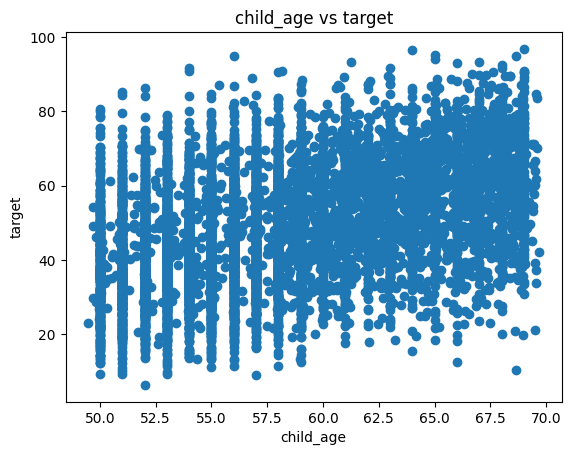

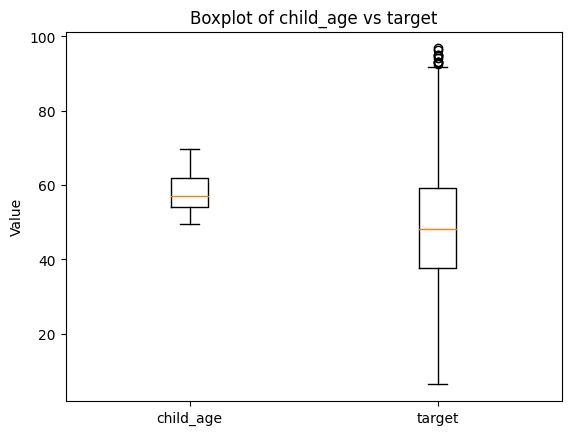

In [35]:
scatterplot(Train['child_age'],Train['target'])
boxplot(Train[['child_age','target']])

#Child age doesn't seem to be correlated to the target, maybe not alone

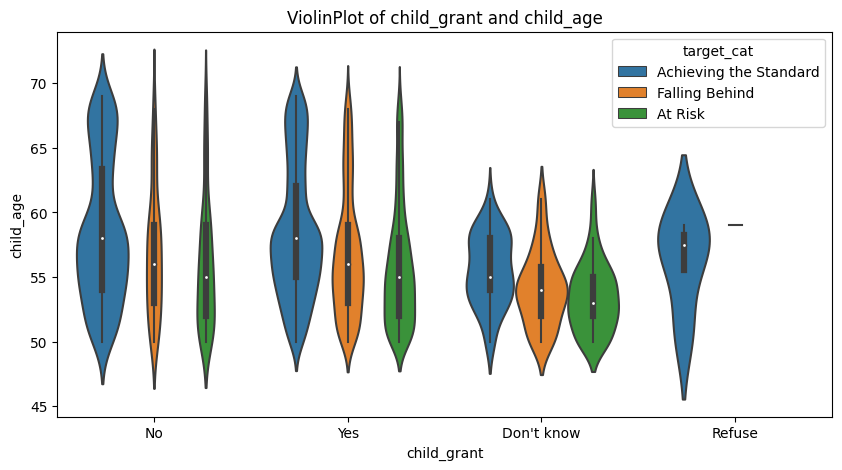

In [36]:
violinplot(x=Train['child_grant'],y=Train['child_age'],hue=Train['target_cat'],scale='count')

In [37]:
Train['age_bin'] = pd.qcut(Train['child_age'],5,labels=False)

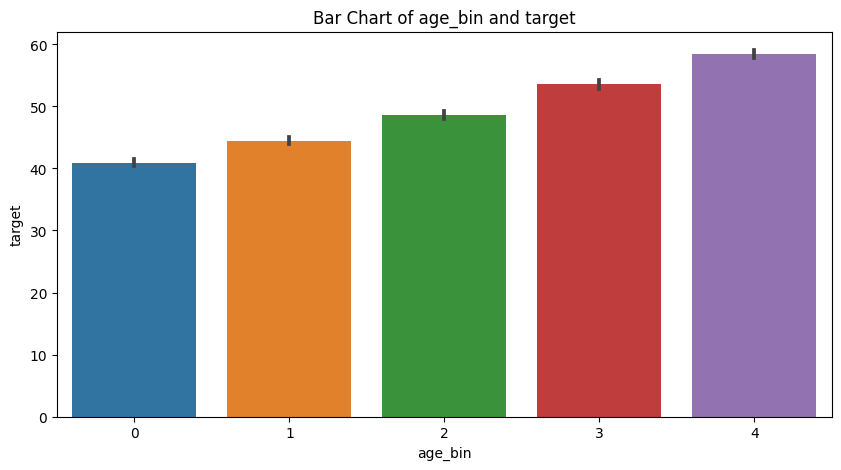

In [38]:
barchart(Train['age_bin'],Train['target'])

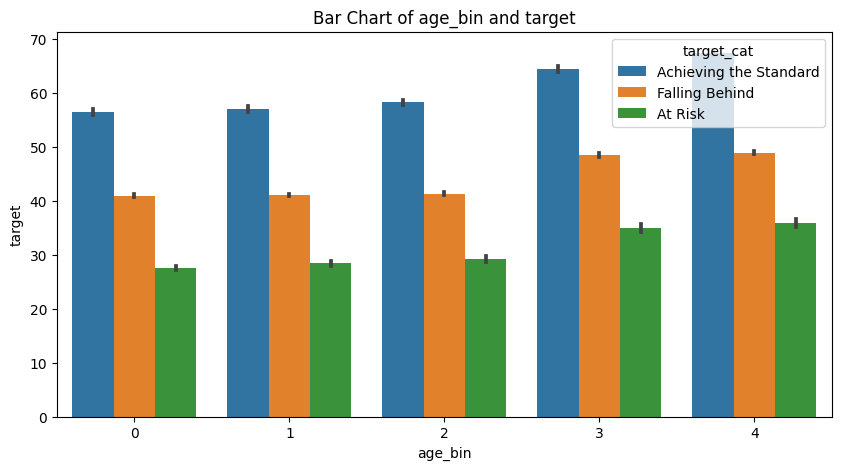

In [39]:
stack_barchart(Train['age_bin'],Train['target'],hue=Train['target_cat'])

In [40]:
grouped = Train.groupby(['age_bin','target_cat'])[['target_cat']].count().rename(columns={'target_cat':'count'})
total_counts = Train.groupby(['age_bin']).size()
grouped['normalized_count'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
grouped.drop('count',axis=1,inplace=True)
grouped

normalized_count
age_bin target_cat                              
0       Achieving the Standard          0.330194
        At Risk                         0.384615
        Falling Behind                  0.285191
1       Achieving the Standard          0.434162
        At Risk                         0.277102
        Falling Behind                  0.288736
2       Achieving the Standard          0.563927
        At Risk                         0.189498
        Falling Behind                  0.246575
3       Achieving the Standard          0.502662
        At Risk                         0.214449
        Falling Behind                  0.282890
4       Achieving the Standard          0.622960
        At Risk                         0.154429
        Falling Behind                  0.222611

In [41]:
"""These insights provide information on the distribution of target categories (i.e., "Achieving the Standard", "Falling Behind", "At Risk") among different age groups (i.e., age bins). 
It suggests that the proportion of children in each target category varies across different age groups, with the proportion of children 
categorized as "Achieving the Standard" generally increasing with age, while the proportion of children categorized as "At Risk" 
generally decreasing with age."""
pass

###child enrollment

In [42]:
Train.filter(like='enrolment')

,child_enrolment_date,child_months_enrolment
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,2020-01-15,20.0
4,2021-10-13,0.0
...,...,...
8580,2021-01-12,9.0
8581,2019-01-15,32.0
8582,2018-01-07,45.0
8583,2021-01-15,9.0


In [43]:
Train.filter(like='enrolment').isnull().sum()/len(Train)

child_enrolment_date      0.6947
child_months_enrolment    0.6947
dtype: float64

In [44]:
Train.filter(like='date')
#It seem child_enrolment_date + child_months_enrolment gives the day the child's ELOM was taken (child_date)

,child_date,child_enrolment_date,pqa_date,pra_date,pri_date,obs_date
0,2022-02-03,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-11,NaN,NaN,NaN,NaN,NaN
3,2021-10-13,2020-01-15,NaN,NaN,NaN,NaN
4,2021-10-13,2021-10-13,2021-10-29,2021-10-29,2021-10-29,2021-10-29
...,...,...,...,...,...,...
8580,2021-11-10,2021-01-12,2021-10-19,2021-10-19,2021-11-10,2021-10-19
8581,2021-10-12,2019-01-15,2021-10-12,2021-10-12,2021-10-12,2021-10-12
8582,2021-11-02,2018-01-07,2021-10-06,2021-10-06,2021-10-06,2021-10-06
8583,2021-11-05,2021-01-15,NaN,NaN,NaN,NaN


In [45]:
Train.filter(like='date').isnull().sum()/len(Train)

child_date              0.212114
child_enrolment_date    0.694700
pqa_date                0.810017
pra_date                0.809668
pri_date                0.810367
obs_date                0.809319
dtype: float64

In [46]:
vard[Train.filter(like='date').columns]
#What do the dates mean? and how are they related?

Variable Name,child_date,child_enrolment_date,pqa_date,pra_date,pri_date,obs_date
Variable Label,ELOM date,Date enrolled in ELP,Date,Date,Date,Date
Answer Label,Open ended,Open ended,Open ended,Open ended,Open ended,Open ended


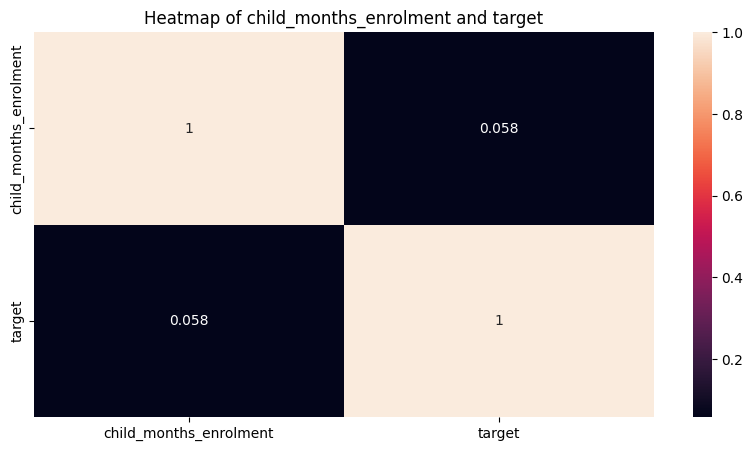

In [47]:
heatmap(Train[['child_months_enrolment','target']])

In [48]:
Train.corr()['child_months_enrolment'].sort_values(ascending=False)[:10]

child_months_enrolment       1.000000
count_practitioners_age_1    0.191992
count_register_year_2019     0.166057
count_register_year_2018     0.136209
id_enumerator                0.122746
count_register_year_2020     0.122652
pri_expense_food             0.116351
count_practitioners_age_0    0.109439
count_practitioners_age_3    0.089108
obs_classrooms               0.087340
Name: child_months_enrolment, dtype: float64

In [49]:
Train[['count_practitioners_age_1','count_register_year_2019', 'count_register_year_2018', 'id_enumerator',
      'count_register_year_2020', 'pri_expense_food','count_practitioners_age_0', 'count_practitioners_age_3','obs_classrooms']].isnull().sum()/len(Train)

count_practitioners_age_1    0.810367
count_register_year_2019     0.459755
count_register_year_2018     0.461153
id_enumerator                0.165754
count_register_year_2020     0.461619
pri_expense_food             0.811415
count_practitioners_age_0    0.810367
count_practitioners_age_3    0.810367
obs_classrooms               0.419336
dtype: float64

In [50]:
#We are missing about 69% of the Child Enrolment Dates? Should we drop the columns?
#There doesn't seem to be an accurate way of replacing the missing dates
#Dropping all columns with missing values up to the 80th percentile
#There doesn't seem to be a positive correlation with months enrolment with other features, CHECK BACK LATER

###child_years_in_programme

In [51]:
Train['child_years_in_programme'].isnull().sum()/len(Train)

0.08223645894001165

In [52]:
Train['child_years_in_programme'].value_counts()

1st year in the programme    4369
2nd year in programme        1917
3rd year in programme        1485
Do Not Know                   108
Name: child_years_in_programme, dtype: int64

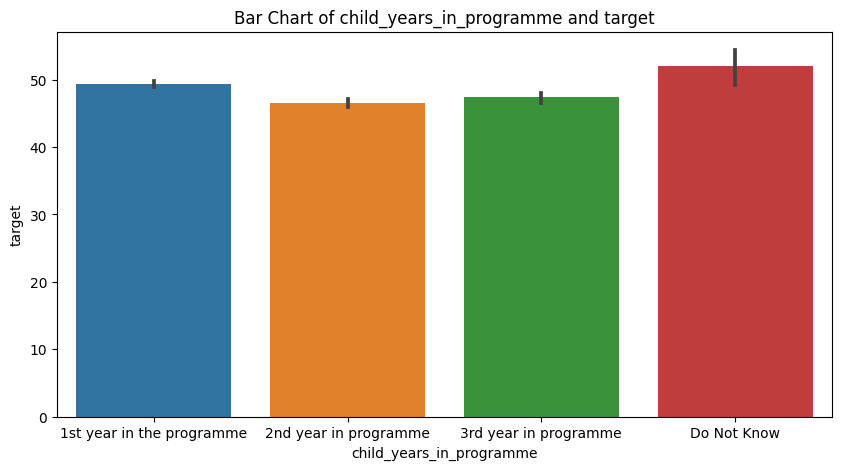

In [53]:
barchart(Train['child_years_in_programme'], Train['target'],10,5)

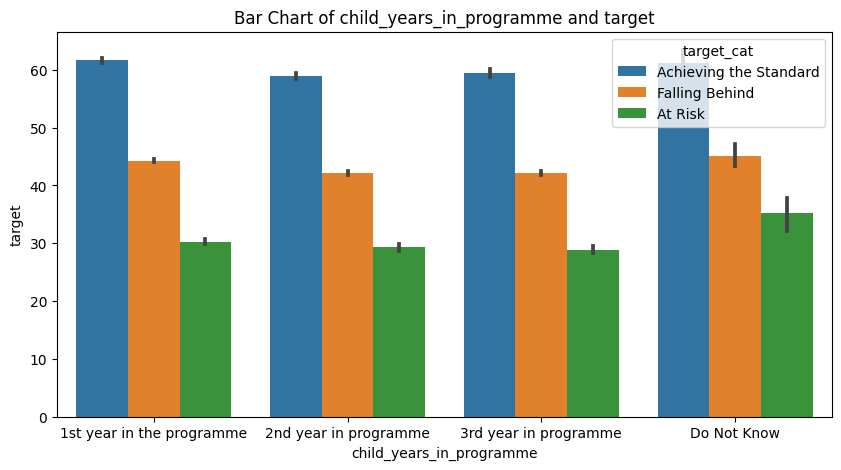

In [54]:
stack_barchart(Train['child_years_in_programme'],Train['target'],hue=Train['target_cat'],length=10,width=5)
#The third year seems to have the most uneven distribution, it has the smallest distribution of the classes of child_grant
#The second years seems to have the most even distribution

In [55]:
grouped = Train.groupby(['child_years_in_programme','target_cat'])[['target_cat']].count().rename(columns={'target_cat':'count'})
total_counts = Train.groupby(['child_years_in_programme']).size()
grouped['normalized_count'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
grouped.drop('count',axis=1,inplace=True)
grouped

normalized_count
child_years_in_programme  target_cat                              
1st year in the programme Achieving the Standard          0.490959
                          At Risk                         0.247425
                          Falling Behind                  0.261616
2nd year in programme     Achieving the Standard          0.462702
                          At Risk                         0.261868
                          Falling Behind                  0.275430
3rd year in programme     Achieving the Standard          0.486869
                          At Risk                         0.243771
                          Falling Behind                  0.269360
Do Not Know               Achieving the Standard          0.555556
                          At Risk                         0.212963
                          Falling Behind                  0.231481

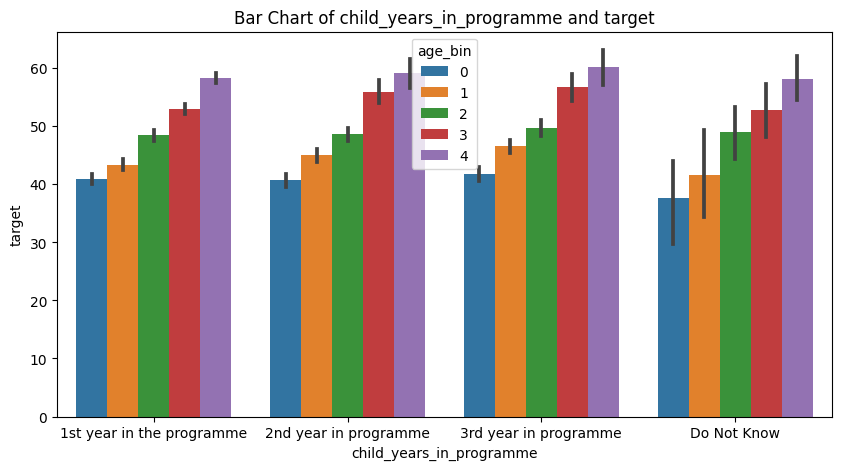

In [56]:
stack_barchart(Train['child_years_in_programme'],Train['target'],hue=Train['age_bin'],length=10,width=5)
#The children seem to be evenly distributed by age groups in the program years

In [57]:
grouped = Train.groupby(['child_years_in_programme','age_bin'])[['age_bin']].count().rename(columns={'age_bin':'count'})
total_counts = Train.groupby(['child_years_in_programme']).size()
grouped['normalized_count'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
grouped.drop('count',axis=1,inplace=True)
grouped

normalized_count
child_years_in_programme  age_bin                  
1st year in the programme 0                0.193179
                          1                0.184253
                          2                0.187686
                          3                0.189746
                          4                0.245136
2nd year in programme     0                0.290037
                          1                0.302556
                          2                0.249348
                          3                0.099113
                          4                0.058946
3rd year in programme     0                0.309764
                          1                0.306397
                          2                0.251852
                          3                0.078788
                          4                0.053199
Do Not Know               0                0.083333
                          1                0.074074
                          2                0.203704
                          3                0.259259
                          4                0.379630

In [58]:
"""Age may impact program participation: The distribution of age groups may impact the number of years children spend in the programme. 
For example, children in age bin 0 (likely younger children) have higher proportions in the first and third years of the programme, 
while children in age bin 1 (slightly older children) have a higher proportion in the second year of the programme. 
This suggests that age may impact the duration of participation in the programme, with younger children potentially spending more time 
in the programme compared to older children."""
pass

###child_height

In [59]:
Train['child_height'].isnull().sum()/len(Train)

0.18823529411764706

In [60]:
Train['child_height']

0              NaN
1       103.000000
2       108.400002
3        98.099998
4       114.000000
           ...    
8580    102.300003
8581    102.599998
8582    103.800003
8583    102.400002
8584    101.000000
Name: child_height, Length: 8585, dtype: float64

<Axes: xlabel='child_height', ylabel='target'>

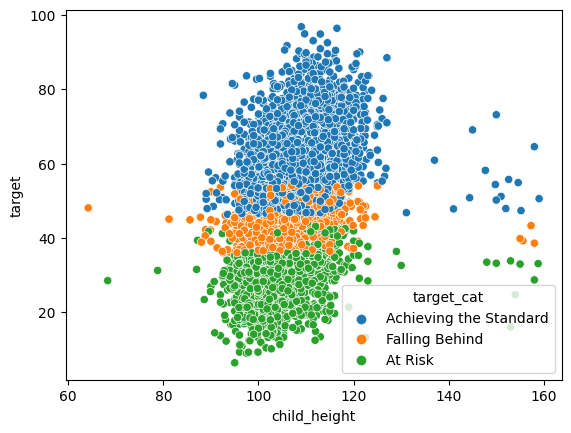

In [61]:
sns.scatterplot(x=Train['child_height'],y=Train['target'],hue=Train['target_cat'])

In [62]:
Train.corr()['child_height'].sort_values(ascending=False)[:15]

child_height              1.000000
child_zha                 0.879123
child_age                 0.404958
age_bin                   0.392548
target                    0.299639
id_facility_n             0.207178
id_prov_n                 0.199543
id_enumerator             0.197156
id_dc_n                   0.196278
id_mn_n                   0.189528
count_toilets_children    0.180029
pri_expense_staff         0.171460
pri_fees_amount_4_6       0.155698
ward_best                 0.140163
pri_expense_rent          0.137326
Name: child_height, dtype: float64

In [63]:
vard['child_zha']

Variable Label    Height for age based on WHO criteria (z-score)
Answer Label                                          Open ended
Name: child_zha, dtype: object

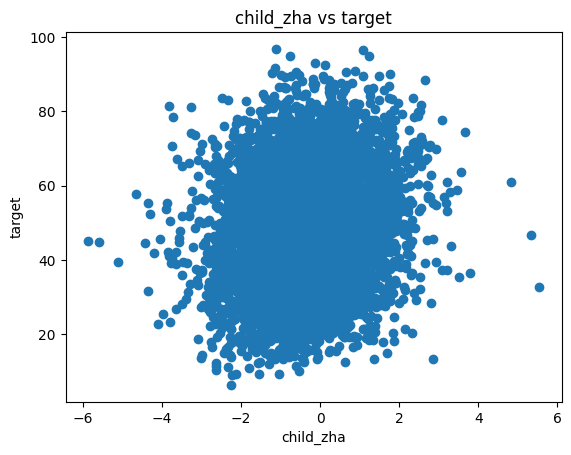

In [64]:
scatterplot(x=Train['child_zha'],y=Train['target'])

In [65]:
Train.corr()['child_zha'].sort_values(ascending=False)[:15]

child_zha                         1.000000
child_height                      0.879123
target                            0.163230
pri_fees_amount_2_3               0.145940
pri_fees_amount                   0.144825
pri_fees_amount_pv                0.143931
pri_fees_amount_0_1               0.131371
pri_expense_staff                 0.127693
pri_amount_funding_fees           0.123105
count_staff_paid                  0.120947
ses_proxy                         0.119087
count_staff_contract_permanent    0.118131
pri_expense_admin                 0.117866
pri_fees_amount_4_6               0.108303
count_staff_paid_assistants       0.100491
Name: child_zha, dtype: float64

###child_observe

In [66]:
Train['child_observe_attentive'].isnull().sum()/len(Train)

0.0

In [67]:
Train['child_observe_attentive'].value_counts()

Often            3192
Almost always    2677
Sometimes        2316
Almost never      400
Name: child_observe_attentive, dtype: int64

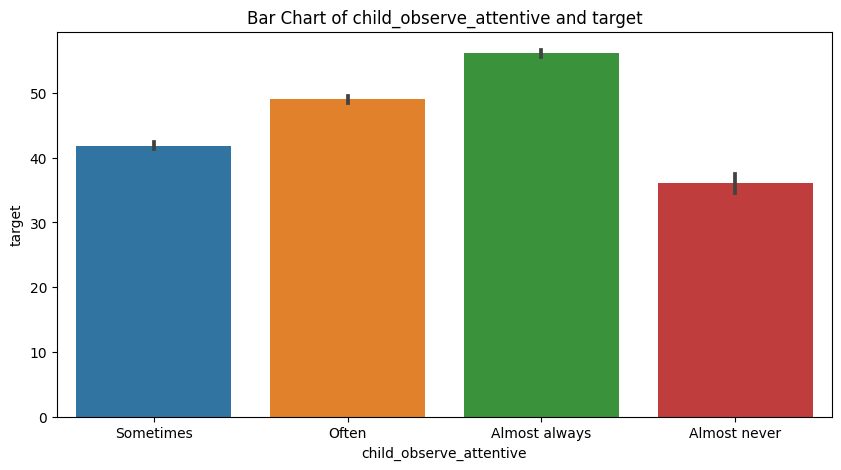

In [68]:
barchart(x=Train['child_observe_attentive'],y=Train['target'])

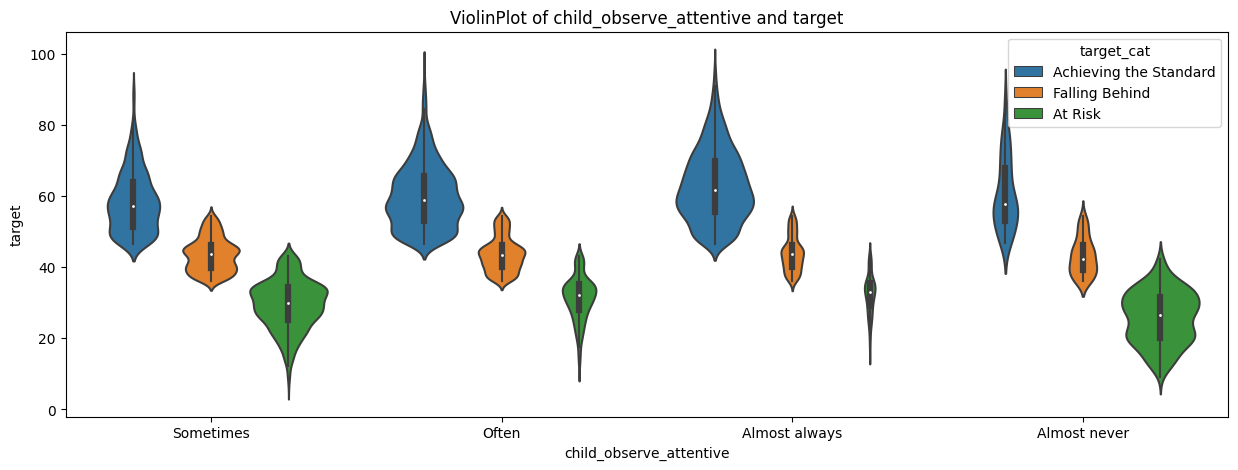

In [69]:
violinplot(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['target_cat'],scale='count',length=15)

In [70]:
grouped = Train.groupby(['child_observe_attentive','target_cat'])[['target_cat']].count().rename(columns={'target_cat':'count'})
total_counts = Train.groupby(['child_observe_attentive']).size()
grouped['normalized_count'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
grouped.drop('count',axis=1,inplace=True)
grouped

normalized_count
child_observe_attentive target_cat                              
Almost always           Achieving the Standard          0.700411
                        At Risk                         0.096003
                        Falling Behind                  0.203586
Almost never            Achieving the Standard          0.190000
                        At Risk                         0.597500
                        Falling Behind                  0.212500
Often                   Achieving the Standard          0.491228
                        At Risk                         0.212719
                        Falling Behind                  0.296053
Sometimes               Achieving the Standard          0.281088
                        At Risk                         0.415803
                        Falling Behind                  0.303109

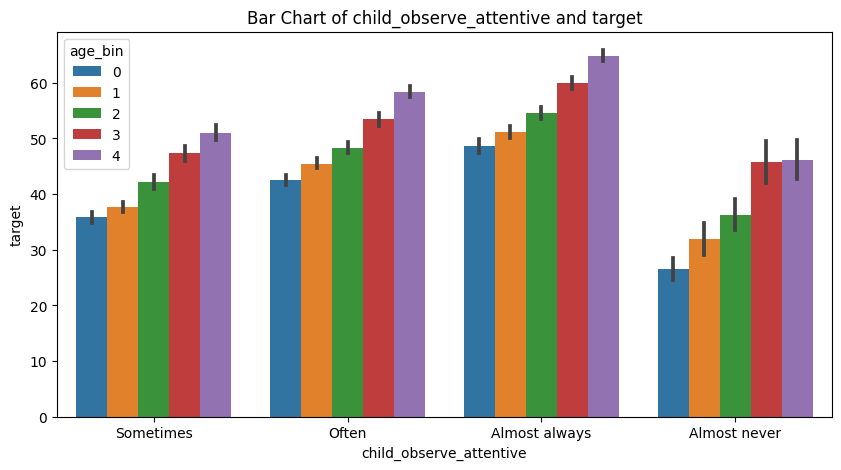

In [71]:
stack_barchart(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['age_bin'])

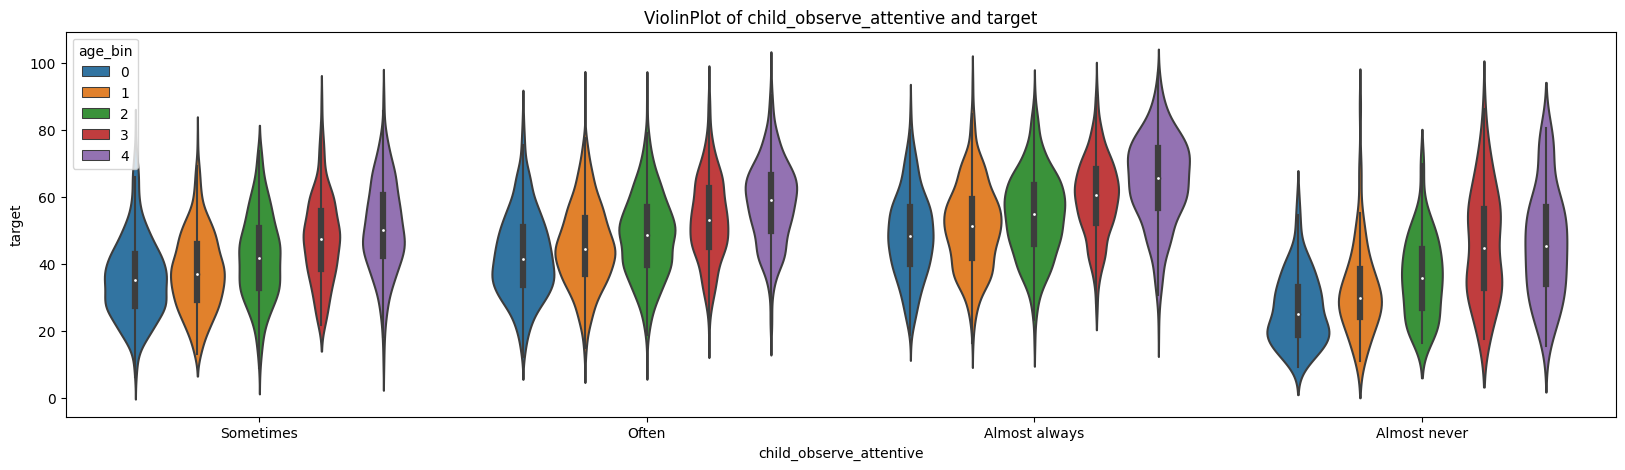

In [72]:
violinplot(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['age_bin'],scale='count',length=20)

In [73]:
grouped = Train.groupby(['child_observe_attentive','age_bin'])[['age_bin']].count().rename(columns={'age_bin':'count'})
total_counts = Train.groupby(['child_observe_attentive']).size()
grouped['normalized_count'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
grouped.drop('count',axis=1,inplace=True)
grouped

normalized_count
child_observe_attentive age_bin                  
Almost always           0                0.168099
                        1                0.212551
                        2                0.225252
                        3                0.163990
                        4                0.230108
Almost never            0                0.277500
                        1                0.192500
                        2                0.182500
                        3                0.160000
                        4                0.187500
Often                   0                0.231830
                        1                0.224311
                        2                0.209900
                        3                0.141604
                        4                0.192356
Sometimes               0                0.263385
                        1                0.228411
                        2                0.175302
                        3                0.155440
                        4                0.177461

In [74]:
"""These insights suggest that higher levels of attentiveness ("Often" and "Almost always") are associated with a higher proportion of 
children achieving the standard, while lower levels of attentiveness ("Sometimes" and "Almost never") are associated with a higher 
proportion of children being at risk or falling behind. This implies that attentiveness may be an important factor influencing children's 
academic performance or progress.
These insights suggest that there may be some variation in the distribution of age groups across different levels of child observance of attentiveness. 
Further analysis or statistical tests may be needed to determine if these differences are statistically significant and to understand any potential relationships 
between child attentiveness, age, and other factors.
Based on the given insights, the age group that appears to be most attentive is age group 4, as it has the highest proportion of children 
who are observed to be attentive 'Almost always'. On the other hand, the age group that appears to be least attentive is age group 3, 
as it has the lowest proportion of children who are observed to be attentive 'Sometimes', 'Often', and 'Almost always'. 
However, it's important to note that these conclusions are based on the data provided and may not necessarily indicate a 
definitive pattern or relationship. Further analysis and statistical tests may be needed to draw more conclusive insights."""
pass

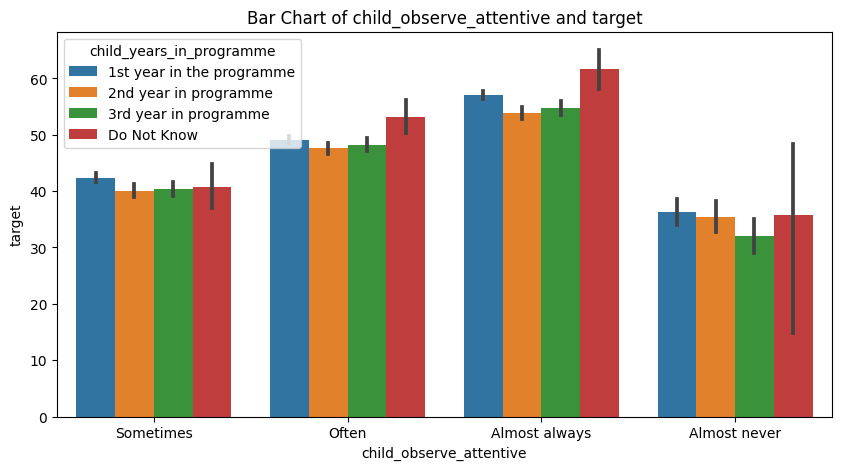

In [75]:
stack_barchart(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['child_years_in_programme'])

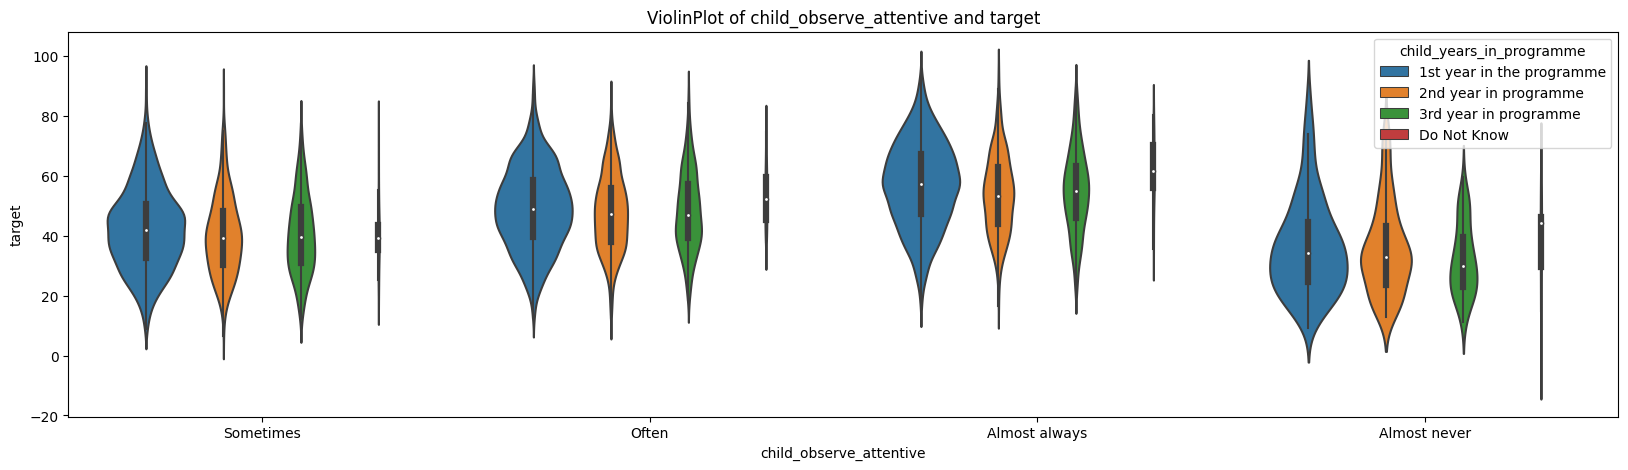

In [76]:
violinplot(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['child_years_in_programme'],scale='count',length=20)

In [77]:
grouped = Train.groupby(['child_observe_attentive','child_years_in_programme'])[['child_years_in_programme']].count().rename(columns={'child_years_in_programme':'count'})
total_counts = Train.groupby(['child_observe_attentive']).size()
grouped['normalized_count'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
grouped.drop('count',axis=1,inplace=True)
grouped

normalized_count
child_observe_attentive child_years_in_programme                   
Almost always           1st year in the programme          0.523347
                        2nd year in programme              0.208069
                        3rd year in programme              0.172208
                        Do Not Know                        0.012327
Almost never            1st year in the programme          0.457500
                        2nd year in programme              0.300000
                        3rd year in programme              0.160000
                        Do Not Know                        0.007500
Often                   1st year in the programme          0.513158
                        2nd year in programme              0.219925
                        3rd year in programme              0.172932
                        Do Not Know                        0.013471
Sometimes               1st year in the programme          0.495250
                        2nd year in programme              0.232297
                        3rd year in programme              0.176166
                        Do Not Know                        0.012522

In [78]:
att = Train[Train['child_observe_attentive']=='Sometimes']
att1 = Train[Train['child_observe_attentive']=='Often']
att2 = Train[Train['child_observe_attentive']=='Almost always']
att3 = Train[Train['child_observe_attentive']=='Almost never']


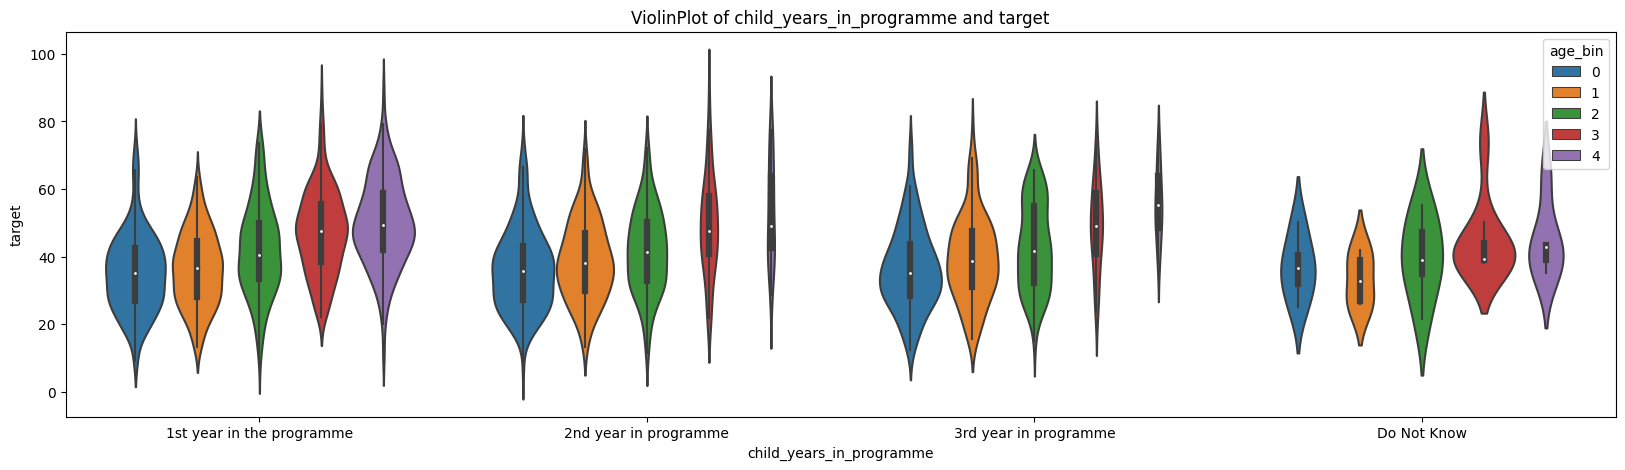

In [79]:
violinplot(x=att['child_years_in_programme'],y=att['target'],hue=att['age_bin'],scale='count',length=20)

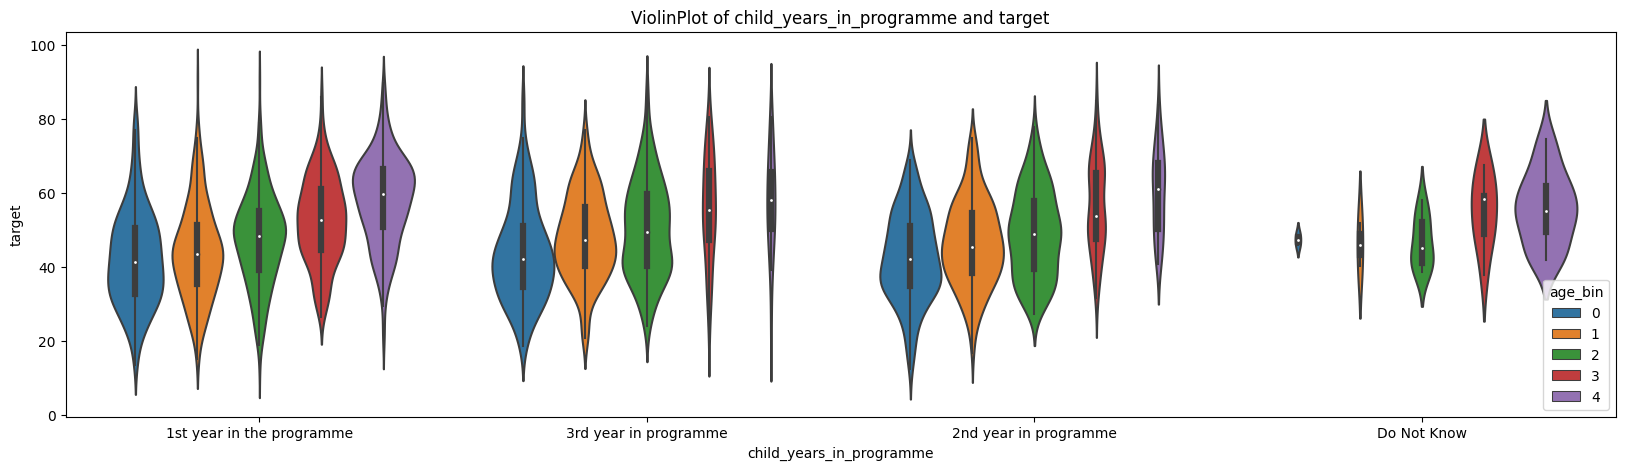

In [80]:
violinplot(x=att1['child_years_in_programme'],y=att1['target'],hue=att1['age_bin'],scale='count',length=20)

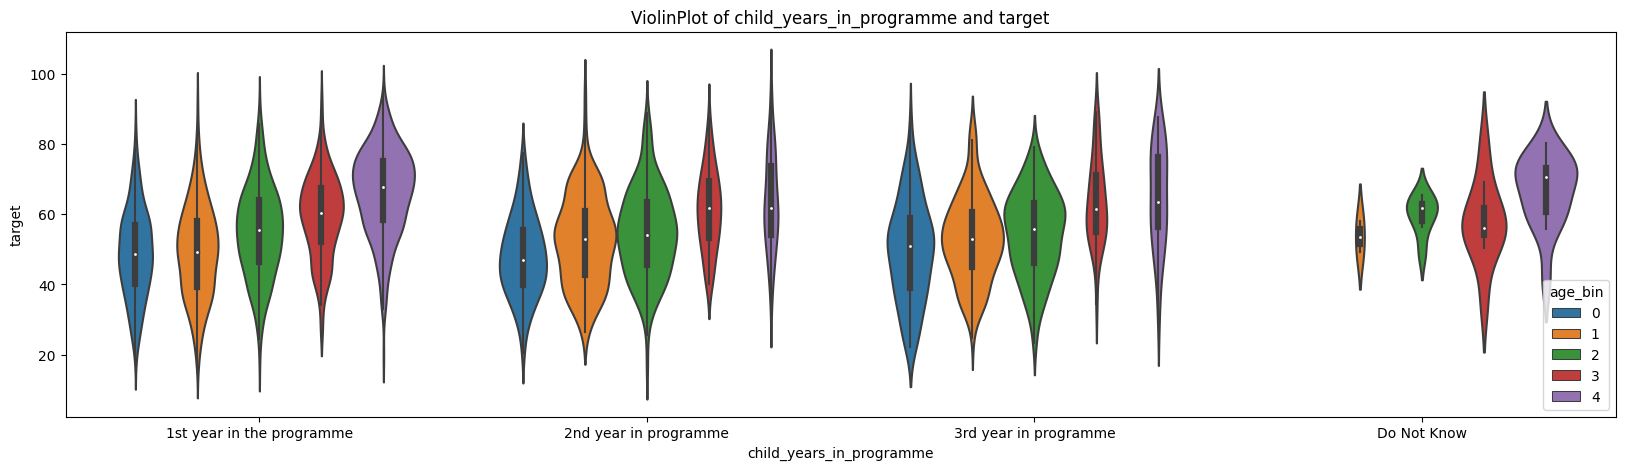

In [81]:
violinplot(x=att2['child_years_in_programme'],y=att2['target'],hue=att2['age_bin'],scale='count',length=20)

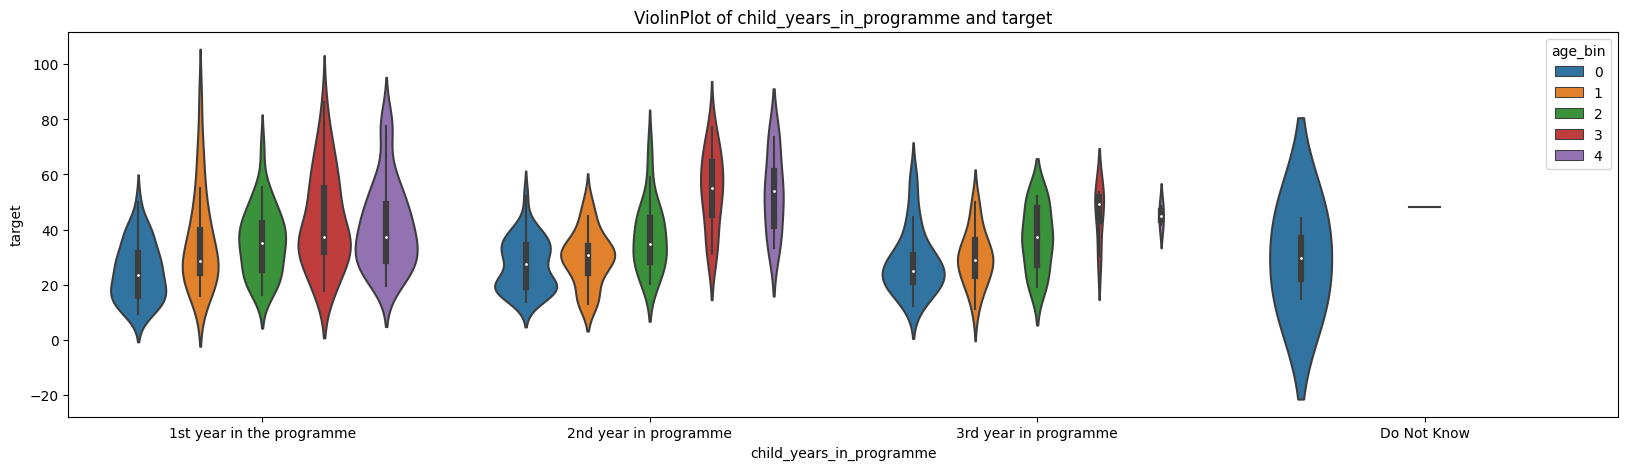

In [82]:
violinplot(x=att3['child_years_in_programme'],y=att3['target'],hue=att3['age_bin'],scale='count',length=20)

In [83]:
grouped = att.groupby(['child_years_in_programme','age_bin'])[['age_bin']].count().rename(columns={'age_bin':'count'})
total_counts = att.groupby(['child_years_in_programme']).size()
grouped['Sometimes'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
sm = grouped.drop('count',axis=1)

In [84]:
grouped = att1.groupby(['child_years_in_programme','age_bin'])[['age_bin']].count().rename(columns={'age_bin':'count'})
total_counts = att1.groupby(['child_years_in_programme']).size()
grouped['Often'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
oft = grouped.drop('count',axis=1)

In [85]:
grouped = att2.groupby(['child_years_in_programme','age_bin'])[['age_bin']].count().rename(columns={'age_bin':'count'})
total_counts = att2.groupby(['child_years_in_programme']).size()
grouped['Almost always'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
alma = grouped.drop('count',axis=1)

In [86]:
grouped = att3.groupby(['child_years_in_programme','age_bin'])[['age_bin']].count().rename(columns={'age_bin':'count'})
total_counts = att3.groupby(['child_years_in_programme']).size()
grouped['Almost never'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
almn = grouped.drop('count',axis=1)

In [87]:
pd.concat([sm,oft,alma,almn],axis=1)

Sometimes     Often  Almost always  \
child_years_in_programme  age_bin                                       
1st year in the programme 0         0.224063  0.205739       0.149893   
                          1         0.188317  0.188645       0.181299   
                          2         0.159547  0.194139       0.203426   
                          3         0.195292  0.181319       0.192719   
                          4         0.232781  0.230159       0.272662   
2nd year in programme     0         0.338290  0.296296       0.228007   
                          1         0.312268  0.300570       0.299820   
                          2         0.215613  0.256410       0.289048   
                          3         0.094796  0.086895       0.114901   
                          4         0.039033  0.059829       0.068223   
3rd year in programme     0         0.372549  0.318841       0.225597   
                          1         0.308824  0.317029       0.299349   
                          2         0.203431  0.255435       0.295011   
                          3         0.073529  0.067029       0.099783   
                          4         0.041667  0.041667       0.080260   
Do Not Know               0         0.172414  0.046512            NaN   
                          1         0.137931  0.046512       0.060606   
                          2         0.206897  0.186047       0.212121   
                          3         0.310345  0.209302       0.303030   
                          4         0.172414  0.511628       0.424242   

                                   Almost never  
child_years_in_programme  age_bin                
1st year in the programme 0            0.218579  
                          1            0.142077  
                          2            0.185792  
                          3            0.207650  
                          4            0.245902  
2nd year in programme     0            0.325000  
                          1            0.283333  
                          2            0.175000  
                          3            0.116667  
                          4            0.100000  
3rd year in programme     0            0.437500  
                          1            0.250000  
                          2            0.218750  
                          3            0.062500  
                          4            0.031250  
Do Not Know               0            0.666667  
                          1                 NaN  
                          2            0.333333  
                          3                 NaN  
                          4                 NaN

In [88]:
"""Older Kids tend to pay more attention than other age groups, but Older Kids are mostly only present in the First Year of the Programme
and the category "Don't Know". The age group 1 pays more attentions that the other groups in the Second Year and Third Year of the Programme, 
While Group 0 which are the youngest set of children most often don't pay attention, compared to others in the Third Year of the Programme."""
pass

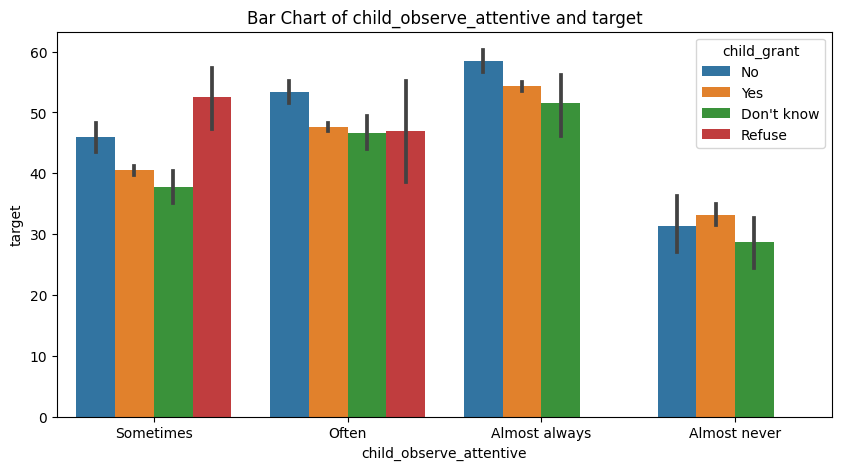

In [89]:
stack_barchart(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['child_grant'])

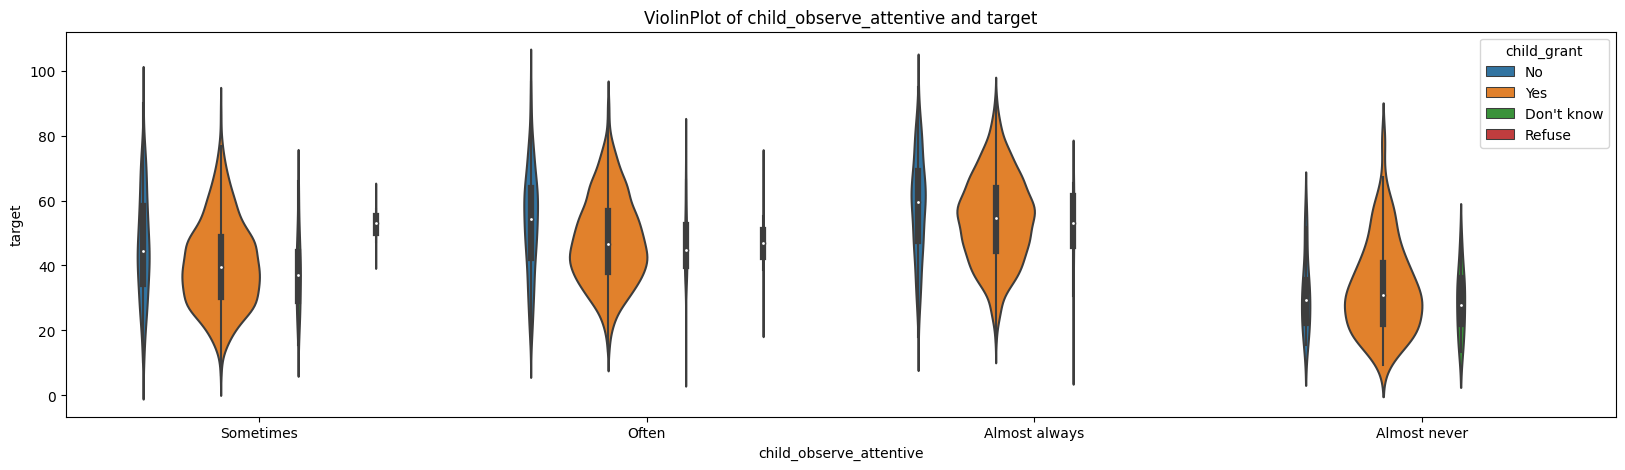

In [90]:
violinplot(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['child_grant'],scale='count',length=20)

In [91]:
grouped = Train.groupby(['child_observe_attentive','child_grant'])[['child_grant']].count().rename(columns={'child_grant':'count'})
total_counts = Train.groupby(['child_observe_attentive']).size()
grouped['normalized_count'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
grouped.drop('count',axis=1,inplace=True)
grouped

normalized_count
child_observe_attentive child_grant                  
Almost always           Don't know           0.008218
                        No                   0.093762
                        Yes                  0.512140
Almost never            Don't know           0.052500
                        No                   0.055000
                        Yes                  0.510000
Often                   Don't know           0.016604
                        No                   0.092732
                        Refuse               0.000627
                        Yes                  0.525063
Sometimes               Don't know           0.031088
                        No                   0.084197
                        Refuse               0.001295
                        Yes                  0.545769

In [92]:
Train['child_observe_concentrated'].isnull().sum()/len(Train)

0.0

In [93]:
Train['child_observe_concentrated'].value_counts()

Often            3102
Sometimes        2669
Almost always    2249
Almost never      565
Name: child_observe_concentrated, dtype: int64

In [94]:
Train.filter(like='observe').columns

Index(['child_observe_attentive', 'child_observe_concentrated',
       'child_observe_diligent', 'child_observe_interested',
       'child_observe_total'],
      dtype='object')

In [95]:
vard[Train.filter(like='observe').columns]

Variable Name,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total
Variable Label,Did the child pay attention to the instructions and demonstrations throughout...,Did the child stay concentrated and on task during the activities and was not...,Was the child careful and diligent on tasks? Was child interested in accuracy?,Was the child interested and curious about the tasks throughout the assessment?,Total score from observing the child during assessments
Answer Label,NaN,NaN,NaN,NaN,Open ended


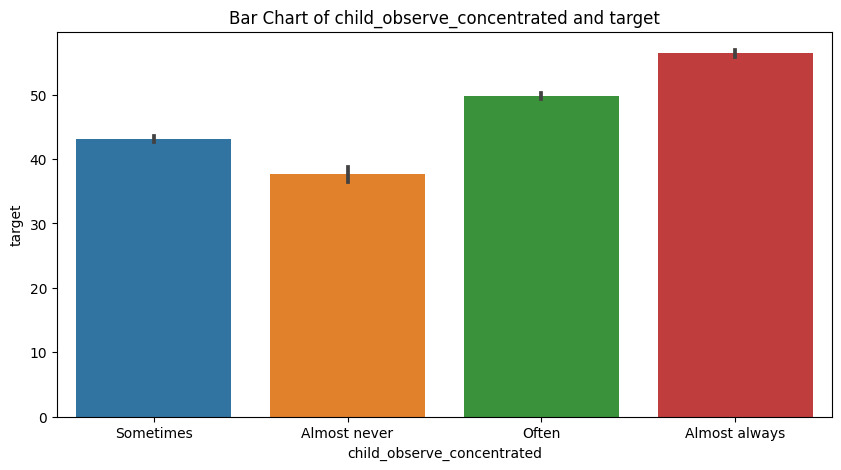

In [96]:
barchart(Train['child_observe_concentrated'],Train['target'])

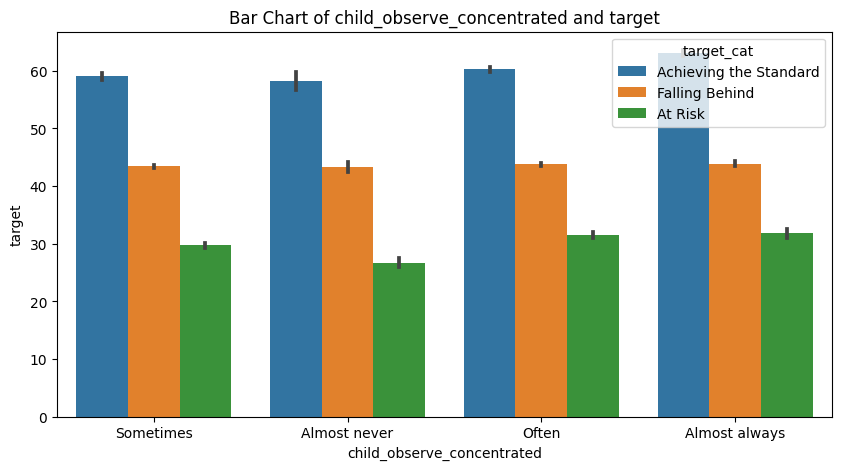

In [97]:
stack_barchart(Train['child_observe_concentrated'],Train['target'],hue=Train['target_cat'])

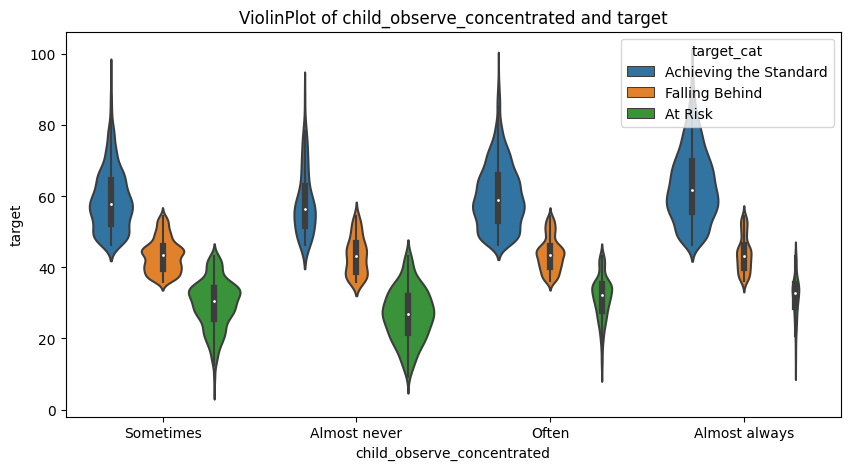

In [98]:
violinplot(Train['child_observe_concentrated'],Train['target'],hue=Train['target_cat'],scale='count')

In [99]:
"""We can Decipher from the ViolinPlot, that Children who "Almost always" stay concentrated on task during the activities have the highest
possible performance Achieving the Standard and are hardly At Risk, followed by Children who "Often" stay concentrated on task during the activities
those who "Almost never" stay concentrated have a higher chance of beeen At Risk and have a lower chance of even Acheiving the Standards similar
to those who "Sometimes" stay concentrated""" 
pass

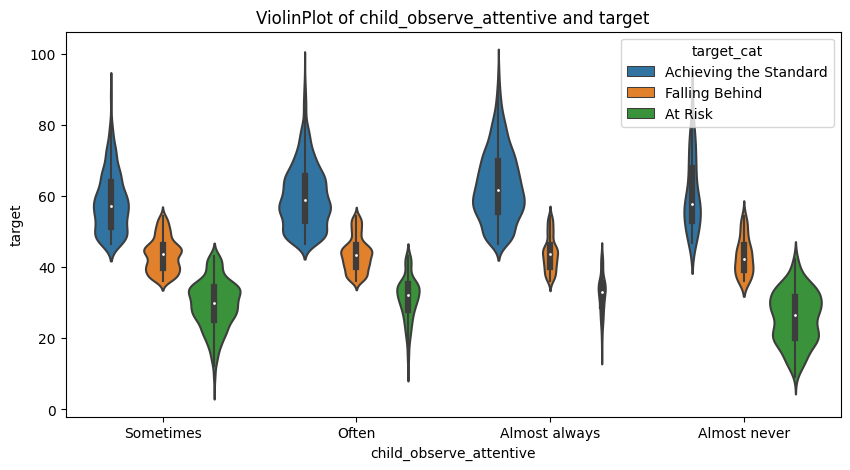

In [100]:
violinplot(Train['child_observe_attentive'],Train['target'],hue=Train['target_cat'],scale='count')

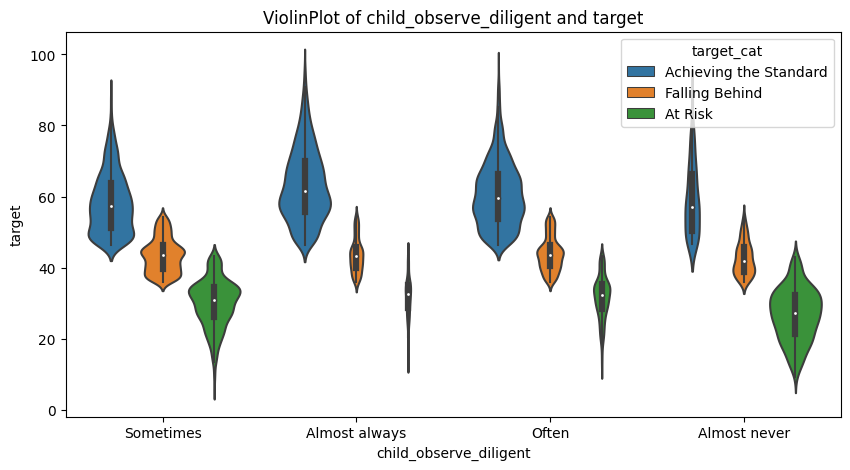

In [101]:
violinplot(Train['child_observe_diligent'],Train['target'],hue=Train['target_cat'],scale='count')

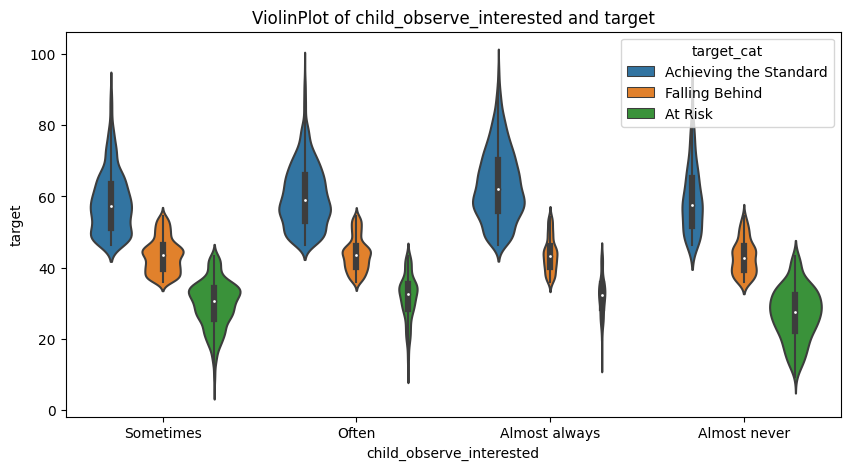

In [102]:
violinplot(Train['child_observe_interested'],Train['target'],hue=Train['target_cat'],scale='count')

In [103]:
grouped = Train.groupby(['child_observe_attentive', 'target_cat'])[['target_cat']].count().rename(columns={'target_cat': 'count'})
total_counts = Train.groupby('child_observe_attentive').size()
grouped['attentive'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
att= grouped.drop(['count'],axis=1)
# grouped = grouped.reset_index()

In [104]:
grouped = Train.groupby(['child_observe_interested', 'target_cat'])[['target_cat']].count().rename(columns={'target_cat': 'count'})
total_counts = Train.groupby('child_observe_interested').size()
grouped['interested'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
interest = grouped.drop(['count'],axis=1)
# grouped = grouped.reset_index()

In [105]:
grouped = Train.groupby(['child_observe_concentrated', 'target_cat'])[['target_cat']].count().rename(columns={'target_cat': 'count'})
total_counts = Train.groupby('child_observe_concentrated').size()
grouped['concentrated'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
conc = grouped.drop(['count'],axis=1)
# grouped = grouped.reset_index()

In [106]:
grouped = Train.groupby(['child_observe_diligent', 'target_cat'])[['target_cat']].count().rename(columns={'target_cat': 'count'})
total_counts = Train.groupby('child_observe_diligent').size()
grouped['diligent'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
dilig = grouped.drop(['count'],axis=1)
# grouped = grouped.reset_index()

In [107]:
pd.concat([att,conc,dilig,interest],axis=1)

attentive  concentrated  diligent  \
              target_cat                                                  
Almost always Achieving the Standard   0.700411      0.709204  0.736767   
              At Risk                  0.096003      0.091152  0.074869   
              Falling Behind           0.203586      0.199644  0.188364   
Almost never  Achieving the Standard   0.190000      0.224779  0.163662   
              At Risk                  0.597500      0.543363  0.588072   
              Falling Behind           0.212500      0.231858  0.248266   
Often         Achieving the Standard   0.491228      0.519020  0.546528   
              At Risk                  0.212719      0.200193  0.173264   
              Falling Behind           0.296053      0.280787  0.280208   
Sometimes     Achieving the Standard   0.281088      0.313975  0.323173   
              At Risk                  0.415803      0.376546  0.366470   
              Falling Behind           0.303109      0.309479  0.310357   

                                      interested  
              target_cat                          
Almost always Achieving the Standard    0.719403  
              At Risk                   0.087846  
              Falling Behind            0.192751  
Almost never  Achieving the Standard    0.209497  
              At Risk                   0.533520  
              Falling Behind            0.256983  
Often         Achieving the Standard    0.525610  
              At Risk                   0.186318  
              Falling Behind            0.288072  
Sometimes     Achieving the Standard    0.307457  
              At Risk                   0.385468  
              Falling Behind            0.307075

In [108]:
#child_observe_diligent > child_observe_attentive > child_observe_interested > child_observe_concentrated

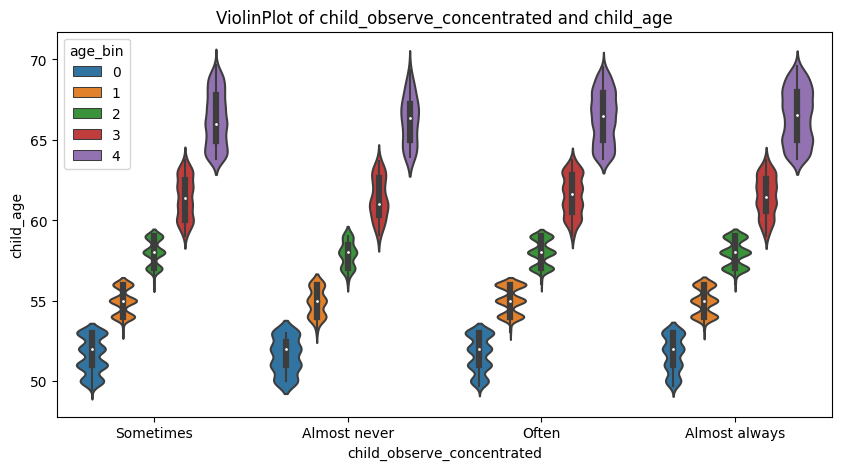

In [109]:
violinplot(x=Train['child_observe_concentrated'],y=Train['child_age'],hue=Train['age_bin'],scale='count')

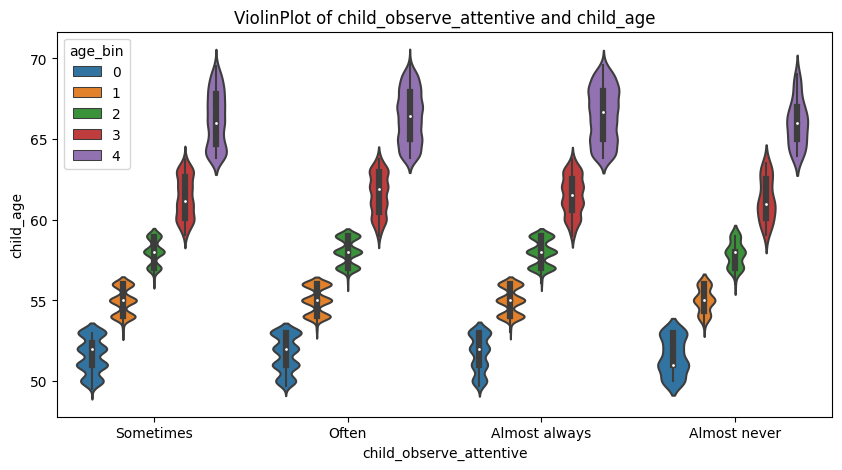

In [110]:
violinplot(x=Train['child_observe_attentive'],y=Train['child_age'],hue=Train['age_bin'],scale='count')

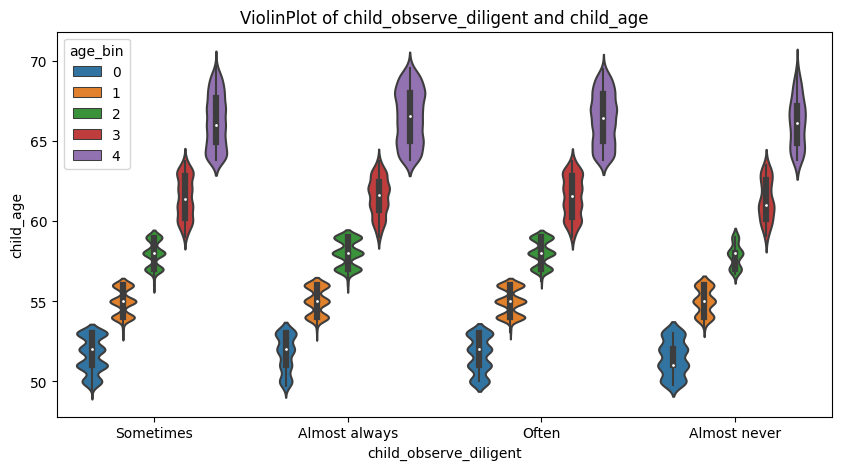

In [111]:
violinplot(x=Train['child_observe_diligent'],y=Train['child_age'],hue=Train['age_bin'],scale='count')

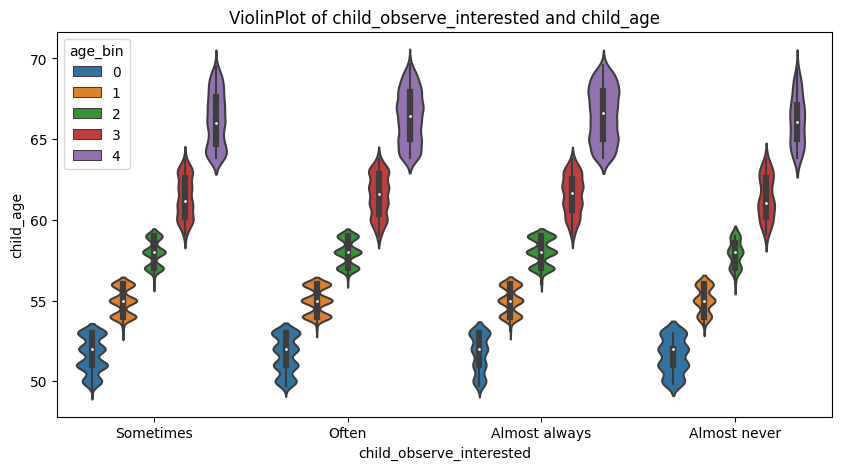

In [112]:
violinplot(x=Train['child_observe_interested'],y=Train['child_age'],hue=Train['age_bin'],scale='count')

In [113]:
"""In all different categories of observation, it seems like age_group 4 are more dominant in the Almost Always category, and 
age_group 0 are more dominant in the Almost never category, this shows that older aged children tend to show more interest, diligence,
concentration and attention, while younger aged children seem to be more carefree""" 
pass

<Axes: xlabel='child_observe_total', ylabel='target'>

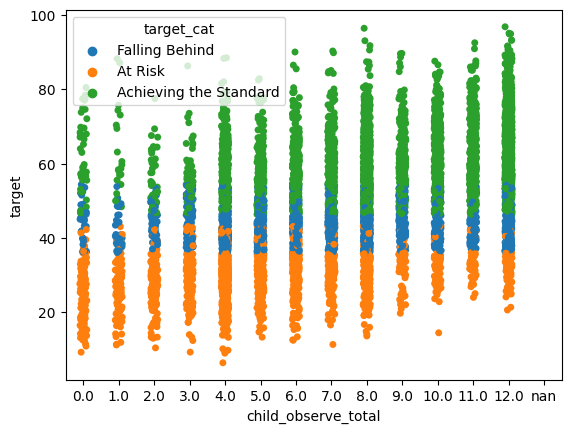

In [114]:
sns.stripplot(x=Train['child_observe_total'],y=Train['target'],hue=Train['target_cat'],jitter=True)

<Axes: xlabel='child_observe_total', ylabel='child_age'>

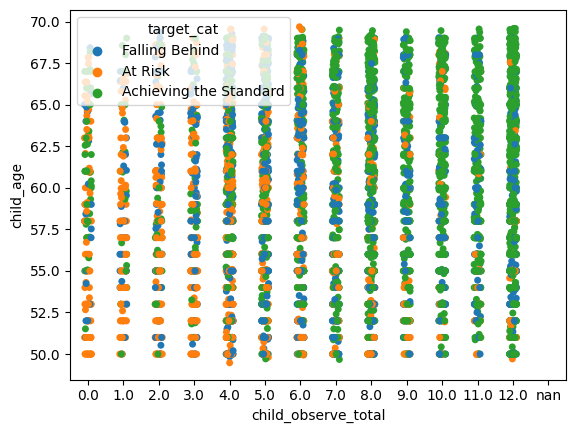

In [115]:
sns.stripplot(x=Train['child_observe_total'],y=Train['child_age'],hue=Train['target_cat'],jitter=True)

<Axes: xlabel='child_observe_total', ylabel='child_height'>

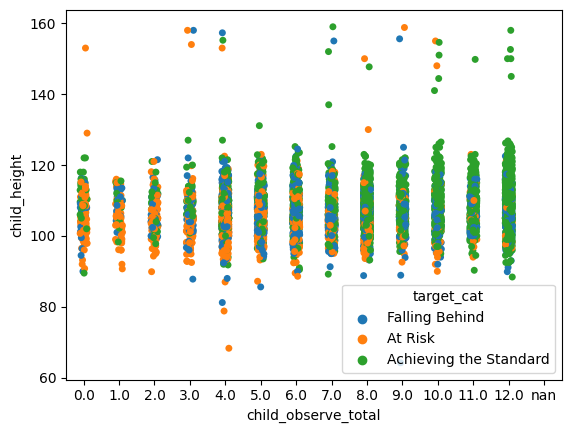

In [116]:
sns.stripplot(x=Train['child_observe_total'],y=Train['child_height'],hue=Train['target_cat'],jitter=True)

###child_gender

In [117]:
Train['child_gender'].isnull().sum()/len(Train)

0.0

In [118]:
Train['child_gender'].value_counts()

Female    4442
Male      4143
Name: child_gender, dtype: int64

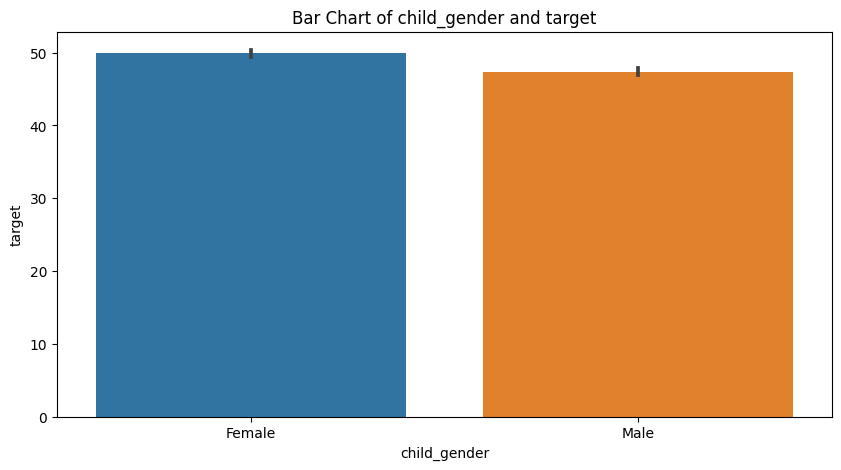

In [119]:
barchart(x=Train['child_gender'],y=Train['target'])

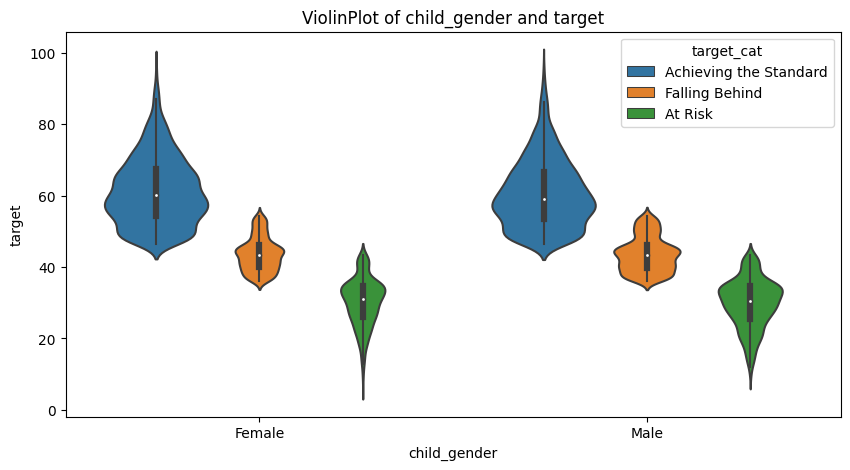

In [120]:
violinplot(x=Train['child_gender'],y=Train['target'],hue=Train['target_cat'],scale='count')

In [121]:
grouped = Train.groupby(['child_gender','target_cat'])[['target_cat']].count().rename(columns={'target_cat':'count'})
total_counts = Train.groupby(['child_gender']).size()
grouped['normalized_count'] = grouped['count'] / total_counts[grouped.index.get_level_values(0)].values
grouped.drop(['count'],axis=1,inplace=True)
grouped

normalized_count
child_gender target_cat                              
Female       Achieving the Standard          0.526339
             At Risk                         0.225799
             Falling Behind                  0.247861
Male         Achieving the Standard          0.442192
             At Risk                         0.273956
             Falling Behind                  0.283852

In [122]:
"""It seems like Female Kids are more likely to Achieve the standard than Male Kids, but Male kids have a higher chance to be At Risk and Falling Behind"""
pass

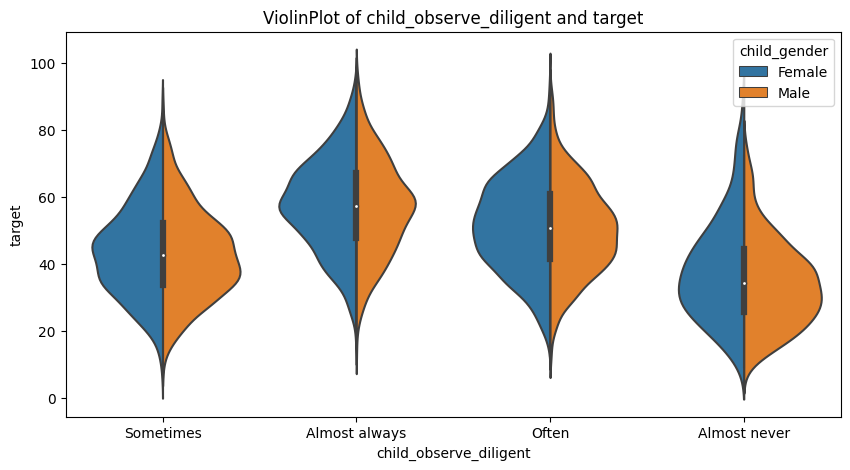

In [123]:
violinplot(x=Train['child_observe_diligent'],y=Train['target'],hue=Train['child_gender'],split=True,scale='count')

In [124]:
"""The Female gender has a more spread out distribution than the male counterpart, for the attention levels Almost always and Often, and have 
a smaller distribution than their male counterparts for the attention levels Sometimes and Often"""
pass

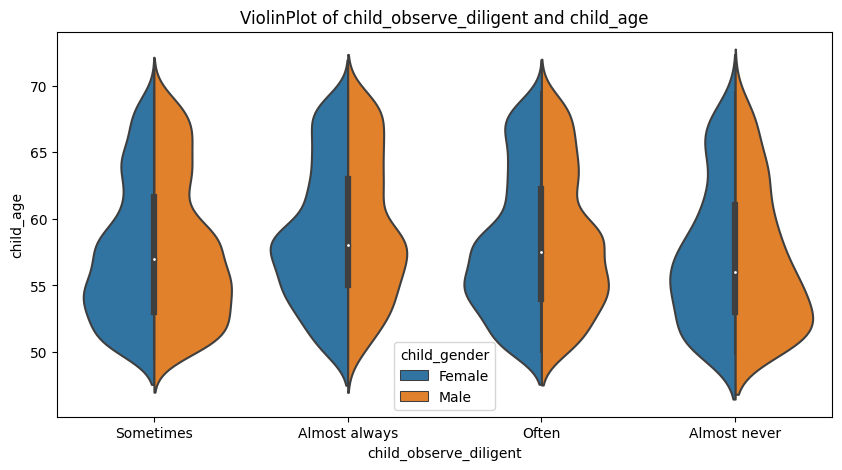

In [125]:
violinplot(x=Train['child_observe_diligent'],y=Train['child_age'],hue=Train['child_gender'],split=True,scale='count')

In [126]:
""""The Female gender has a more spread out distribution than the male counterpart, for the attention levels Almost always and Often, and have 
a smaller distribution than their male counterparts for the attention levels Sometimes and Often"""
pass

###child_dob

In [127]:
Train['child_dob'].isnull().sum()/len(Train)

0.16959813628421666

In [128]:
Train['Year_dob'] = Train['child_dob'].str.split('-',expand=True)[0].astype(float)
Train['Month_dob'] = Train['child_dob'].str.split('-',expand=True)[1].astype(float)
Train['Day_dob'] = Train['child_dob'].str.split('-',expand=True)[2].astype(float)


In [129]:
Train['Year_dob'].value_counts()

2017.0    4174
2016.0    2497
2015.0     237
2018.0     221
Name: Year_dob, dtype: int64

In [130]:
Train['Month_dob'].value_counts()

12.0    753
3.0     700
7.0     681
1.0     646
11.0    643
6.0     629
5.0     615
4.0     594
2.0     574
8.0     516
10.0    399
9.0     379
Name: Month_dob, dtype: int64

In [131]:
Train['Day_dob'].value_counts()

17.0    316
3.0     280
16.0    276
28.0    264
24.0    263
8.0     250
11.0    250
12.0    249
5.0     244
2.0     243
18.0    238
7.0     233
1.0     233
21.0    231
25.0    231
20.0    229
23.0    228
6.0     226
15.0    225
9.0     222
14.0    221
13.0    220
27.0    215
10.0    211
4.0     208
30.0    207
22.0    206
26.0    202
29.0    199
19.0    197
31.0    112
Name: Day_dob, dtype: int64

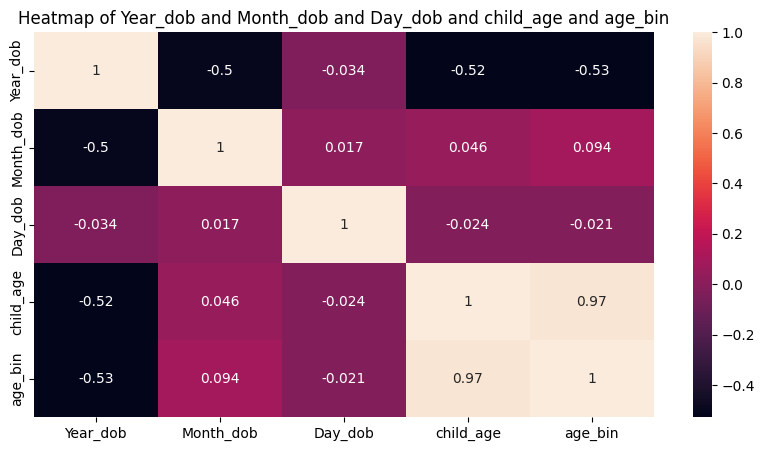

In [132]:
heatmap(Train[['Year_dob','Month_dob','Day_dob','child_age','age_bin']])

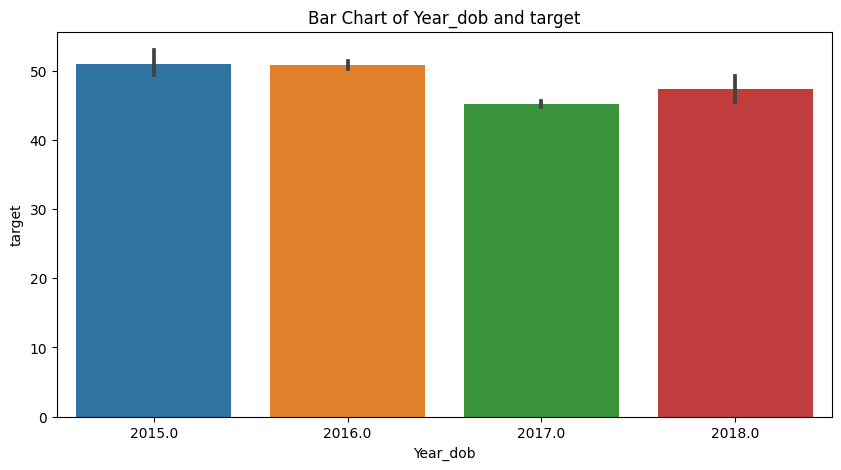

In [133]:
barchart(Train['Year_dob'],Train['target'])

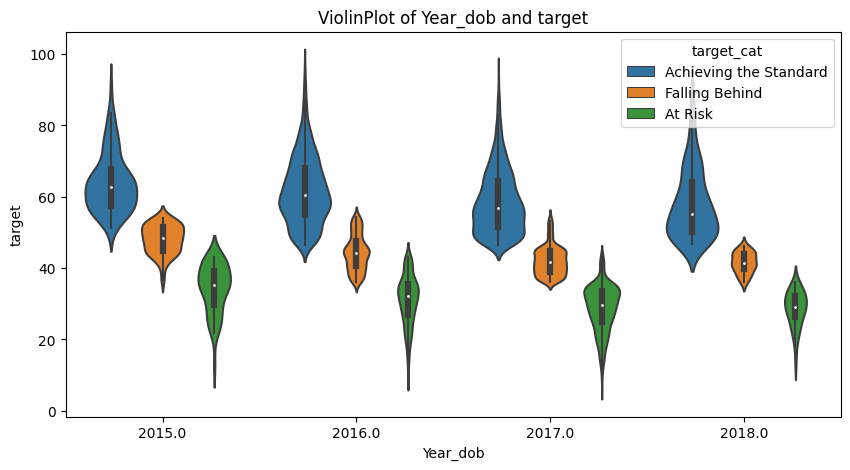

In [134]:
violinplot(Train['Year_dob'],Train['target'],hue=Train['target_cat'],scale='count')

In [135]:
grouped = Train.groupby(['Year_dob','target_cat'])[['target_cat']].count().rename(columns={'target_cat':'count'})
total_counts = Train.groupby(['Year_dob']).size()
grouped['normalized_count'] = grouped['count']/total_counts[grouped.index.get_level_values(0)].values
grouped.drop(['count'],axis=1,inplace=True)
grouped

normalized_count
Year_dob target_cat                              
2015.0   Achieving the Standard          0.409283
         At Risk                         0.257384
         Falling Behind                  0.333333
2016.0   Achieving the Standard          0.526231
         At Risk                         0.209852
         Falling Behind                  0.263917
2017.0   Achieving the Standard          0.429085
         At Risk                         0.297796
         Falling Behind                  0.273119
2018.0   Achieving the Standard          0.524887
         At Risk                         0.221719
         Falling Behind                  0.253394

In [306]:
"""There seems to be an upward and downward trend among the Years, the target performance improved from the year 2015 - 2016 the became worse in the year 2017
the become better for those born in the year 2018, why is there a downwards trend between children born in 2016-2017, and why is there an upwards trend
between those born in 2017-2018, same happened in 2015-2016"""
pass

In [307]:
Train.groupby(['Year_dob','Month_dob','target_cat'])[['target_cat']].count().rename(columns={'target_cat':'count'})

count
Year_dob Month_dob target_cat                   
2015.0   1.0       Achieving the Standard      5
                   Falling Behind              1
         2.0       Achieving the Standard      4
                   At Risk                     3
                   Falling Behind              3
...                                          ...
2018.0   8.0       Falling Behind              4
         9.0       Achieving the Standard      1
                   At Risk                     1
         10.0      At Risk                     2
                   Falling Behind              1

[135 rows x 1 columns]

###child

##Feature Engineering

In [130]:
def logic_mapping(att, conc, dilig, interest):
  logic_map = {'Sometimes':False,'Often':True,'Almost always':True,'Almost never':False}
  result_and = (logic_map[att]) and (logic_map[conc]) and (logic_map[dilig]) and (logic_map[interest])
  result_or = (logic_map[att]) or (logic_map[conc]) or (logic_map[dilig]) or (logic_map[interest])
  result_nand = (not(logic_map[att])) and (not(logic_map[conc])) and (not(logic_map[dilig])) and (not(logic_map[interest]))
  result_nor = (not(logic_map[att])) and (not(logic_map[conc])) and (not(logic_map[dilig])) and (not(logic_map[interest]))
  logic_remap = {True:0,False:1}
  return logic_remap[result_and], logic_remap[result_or], logic_remap[result_nand], logic_remap[result_nor]

In [131]:
attention_mapping = {'Sometimes': 2, 'Often': 3, 'Almost always': 4, 'Almost never': 1}
programme_year_mapping = {'1st year in the programme':1, '2nd year in programme': 2, '3rd year in programme':3, 'Do Not Know':4} 
Logic_ops = data[['child_observe_attentive','child_observe_concentrated','child_observe_diligent','child_observe_interested']].apply(
    lambda row: logic_mapping(row[0],row[1],row[2],row[3]), axis=1)
data['AND_Observe'] = Logic_ops.apply(lambda row: row[0])
data['OR_Observe'] = Logic_ops.apply(lambda row: row[1])
data['NAND_Observe'] = Logic_ops.apply(lambda row: row[2])
data['NOR_Observe'] = Logic_ops.apply(lambda row: row[3])
data['child_years_in_programme'] = data['child_years_in_programme'].map(programme_year_mapping)
data['age_bin'] = pd.qcut(data['child_age'],5,labels=False)
data['child_observe_attentive'] = data['child_observe_attentive'].map(attention_mapping)
data['child_observe_concentrated'] = data['child_observe_concentrated'].map(attention_mapping)
data['child_observe_diligent'] = data['child_observe_diligent'].map(attention_mapping)
data['child_observe_interested'] = data['child_observe_interested'].map(attention_mapping)
data['child_observe_totals'] = data['child_observe_diligent'] * 4 + data['child_observe_attentive'] * 3 + data['child_observe_concentrated'] * 2 + data['child_observe_interested'] * 1
data['child_observe_totals*'] = (data['child_observe_diligent'] * 4) * (data['child_observe_attentive'] * 3) * (data['child_observe_concentrated'] * 2) * (data['child_observe_interested'] * 1)
data['weighted_child_age+attention'] = data['child_observe_diligent'] + data['age_bin'] + 1 + data['child_observe_attentive'] 
data['weighted_child_age*attention'] = data['child_observe_diligent'] * (data['age_bin']+1) * data['child_observe_attentive']
data['weighted_child_age+prog_year+attention'] = data['child_years_in_programme'] + data['child_observe_diligent'] + data['age_bin'] + 1 + data['child_observe_attentive']
data['weighted_child_age*prog_year*attention'] = data['child_years_in_programme'] * data['child_observe_diligent'] * (data['age_bin']+1) * data['child_observe_attentive']

In [134]:
data['Year_dob'] = data['child_dob'].str.split('-',expand=True)[0].astype(float)
data['Month_dob'] = data['child_dob'].str.split('-',expand=True)[1].astype(float)
data['Day_dob'] = data['child_dob'].str.split('-',expand=True)[2].astype(float)
data['child_gender'] = data['child_gender'].map({'Female':1,'Male':2})

In [135]:
data['Count_observe_totals_level_per_age_group'] = data.groupby(['age_bin','child_observe_totals'])[['child_observe_totals']].transform('count')

In [136]:
data['Mean_observe_totals_level_per_age_group'] = data.groupby(['age_bin','child_observe_totals'])[['child_observe_totals']].transform('mean')

In [137]:
data['sum_observe_totals_level_per_age_group'] = data.groupby(['age_bin','child_observe_totals'])[['child_observe_totals']].transform('sum')

In [138]:
data['Mean_weighted_attentive_level_per_gender'] = data.groupby(['child_gender'])[['weighted_child_age+prog_year+attention']].transform('mean')

In [139]:
data['Mean_weighted_attentive*_level_per_gender'] = data.groupby(['child_gender'])[['weighted_child_age*prog_year*attention']].transform('mean')

In [218]:
new_Train = data[data['Train']=='Train']
new_Test = data[data['Train']=='Test']

#Baseline Score

In [219]:
def Baseline_Pred(model, X, y, test, scaler=None, verbose=False, predictions=True):
  fold = KFold(n_splits=5)
  test_preds = []
  oof_f1 = []
  for train_index, test_index in fold.split(X, y):
    X_train, X_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=verbose)
    preds=model.predict(X_test)
    if predictions:
      test_pred = model.predict(test[X.columns])
      test_preds.append(test_pred)
    print(f"RMSE {mean_squared_error(y_test,preds,squared=False)}")
    oof_f1.append(mean_squared_error(y_test,preds,squared=False))

  print(f"Average_RMSE {sum(oof_f1)/5}")
  if predictions: 
    return test_preds, model
  return model

###Numerical Columns

In [220]:
# num_cols = list(set(Test.select_dtypes('number')).intersection(Train.select_dtypes('number')))
num_cols = new_Train.select_dtypes('number').columns
num_train = new_Train[num_cols]
#num_test = Test[num_cols]

In [221]:
missing_train_cols= plot_missing_cols(num_train, threshold=0.8, plot=False)
#missing_test_cols = plot_missing_cols(num_test, threshold=0.8, plot=False)
num_Train = num_train.drop(missing_train_cols,axis=1)
#num_Test = num_test.drop(missing_test_cols,axis=1)

In [222]:
model_cbc = CatBoostRegressor(eval_metric='RMSE')
model_lgb = LGBMRegressor()

In [223]:
num_Train.drop(['target','child_age','child_height','child_observe_total'],axis=1,inplace=True)

In [224]:
cbc_model = Baseline_Pred(model_cbc, num_Train, Train['target'], Test, verbose=False, predictions=False)

RMSE 9.89040383457556
RMSE 9.892010407339907
RMSE 9.906037692401844
RMSE 9.876528459172121
RMSE 10.083266822964204
Average_RMSE 9.929649443290728


In [225]:
features_cbc = pd.DataFrame({'feature': list(num_Train.columns), 'importance': cbc_model.feature_importances_}).sort_values('importance', ascending = False)
features_cbc.head(30)


,feature,importance
10,id_enumerator,11.504583
109,weighted_child_age*attention,6.365410
108,weighted_child_age+attention,5.868118
26,teacher_emotional_total,5.362253
8,child_zha,4.801790
72,id_team,3.718187
28,id_ward,2.762468
34,latitude,2.593672
11,id_facility,2.349043
24,teacher_social_total,2.306582


###Categorical Columns

In [ ]:

cat_cols = Train.select_dtypes(include=['object']).columns


In [ ]:
le = LabelEncoder()

In [ ]:
test_cat_cols = Test.select_dtypes('object').columns

In [ ]:
cat_train = Train[cat_cols]
cat_test = Test[test_cat_cols]
missing_cols_train = plot_missing_cols(cat_train,threshold=0.8,plot=False)
missing_cols_test = plot_missing_cols(cat_test, threshold=0.8,plot=False)

In [ ]:
cat_Train = cat_train.drop(missing_cols_train,axis=1)
cat_Test = cat_test.drop(missing_cols_test,axis=1)

In [ ]:
for col in cat_Train.columns:
  cat_Train[col] = le.fit_transform(cat_Train[col])

In [ ]:
for col in cat_Test.columns:
  cat_Test[col] = le.fit_transform(cat_Test[col])

In [ ]:
cat_Train.drop(['child_id'],axis=1,inplace=True)
cat_Test.drop(['child_id'],axis=1,inplace=True)

In [ ]:
model_cbc = CatBoostRegressor(eval_metric='RMSE')

In [ ]:
cbc_preds, cbc_model = Baseline_Pred(model_cbc, cat_Train, Train['target'], cat_Test)

Learning rate set to 0.068909
0:	learn: 14.8490521	test: 14.9501283	best: 14.9501283 (0)	total: 14.2ms	remaining: 14.2s
200:	learn: 9.6851307	test: 10.8059703	best: 10.8059703 (200)	total: 2.2s	remaining: 8.75s
400:	learn: 8.5918430	test: 10.5717527	best: 10.5717527 (400)	total: 6.59s	remaining: 9.85s
600:	learn: 7.8813659	test: 10.4825866	best: 10.4825866 (600)	total: 8.51s	remaining: 5.65s
800:	learn: 7.3504625	test: 10.4260275	best: 10.4236185 (793)	total: 10.4s	remaining: 2.59s
999:	learn: 6.9070716	test: 10.3981200	best: 10.3970409 (953)	total: 12.4s	remaining: 0us

bestTest = 10.39704089
bestIteration = 953

Shrink model to first 954 iterations.
RMSE 10.397040890663636
Learning rate set to 0.068909
0:	learn: 14.8672276	test: 14.8676553	best: 14.8676553 (0)	total: 15.5ms	remaining: 15.5s
200:	learn: 9.6293003	test: 10.8097779	best: 10.8097779 (200)	total: 2.05s	remaining: 8.14s
400:	learn: 8.5092754	test: 10.5692738	best: 10.5692738 (400)	total: 5.35s	remaining: 8s
600:	learn: 7.7

##Submission

In [ ]:
explainer = shap.Explainer(cbc_model)

In [ ]:
# Compute the SHAP values for your test dataset
shap_values = explainer(num_Test)

In [ ]:
xd = num_Test.copy()
xd[num_Test.columns] = shap_values.values

In [ ]:
top_cols = xd.apply(lambda x: x.nlargest(15).index.tolist(), axis=1)

In [ ]:
feature_cols = Sub.filter(like='feature').columns

In [ ]:
xdc = pd.DataFrame(columns=feature_cols)
for i, cols in enumerate(top_cols):
  xdc.loc[i] = cols

In [ ]:
Sub['target'] = sum(cbc_preds)/5

In [ ]:
Sub[feature_cols] = xdc[feature_cols]

In [ ]:
Sub.to_csv('/content/Baseline_Only_Numerical_Columns_above_0.8threshold_CatBoost_Sub.csv',index=False)